In [1]:
import h2o
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch 
from h2o.estimators.xgboost import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
#import xgboost as xgb
h2o.init(max_mem_size='6G') # give h2o as much memory as possible
h2o.no_progress() # turn off h2o progress bars
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
sns.set()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,21 hours 28 mins
H2O cluster version:,3.12.0.1
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_zhaorc_9ea5bz
H2O cluster total nodes:,1
H2O cluster free memory:,3.481 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


### Import Data & Create Sales Price Dummy Column in Test Dataset

In [2]:
target = h2o.import_file('/Users/zhaorc/Desktop/ML/train_2016_v2.csv')
target.describe()
print('=======================================')
prop=h2o.import_file('/Users/zhaorc/Desktop/ML/properties_2016.csv')
prop.describe()

Rows:90275
Cols:3




,parcelid,logerror,transactiondate
type,int,real,time
mins,10711738.0,-4.605,1451606400000.0
mean,12984656.108712263,0.011457219606757139,1465669839260.038
maxs,162960842.0,4.737,1483056000000.0
sigma,2504510.4883017694,0.16107883536718676,7410679638.772143
zeros,0,847,0
missing,0,0,0
0,11016594.0,0.027600000000000003,2016-01-01 00:00:00
1,14366692.0,-0.16840000000000002,2016-01-01 00:00:00
2,12098116.0,-0.004,2016-01-01 00:00:00


Rows:2985217
Cols:58




,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
type,int,int,int,int,real,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,int,real,int,int,int,int,int,int,int,enum,real,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int,int,int,int,real,enum,int,int
mins,10711725.0,1.0,2.0,20.0,0.0,0.0,1.0,1.0,1.0,66.0,3.0,1.0,1.0,120.0,112.0,3.0,117.0,6037.0,1.0,1.0,0.0,0.0,,1.0,33324388.0,-119475780.0,100.0,1.0,19.0,1.0,1.0,1.0,0.0,31.0,,60371011.101,3491.0,1286.0,6952.0,95982.0,0.0,7.0,1.0,4.0,1.0,10.0,10.0,1801.0,1.0,,1.0,1.0,2000.0,1.0,1.34,,0.0,-1.0
mean,13325858.360229727,1.931166121803681,7.202606830556012,646.8832923832924,2.2091427336818326,3.0889487979387735,3.7259482144271123,5.784786906083508,2.2992625087306906,66.0,1380.630396069396,1827.1621236925089,1760.0006079321327,1178.900677789364,2739.1872346670316,1388.9445779091066,2414.339439116405,6048.031600185617,1.1687100375195503,2.2441651014159927,1.823516558413254,383.7693573970272,,4.012053248420491,34001468.65372137,-118201934.1594266,22822.805527748264,1.0,519.7109799713875,1.0,1.0,1.0,204.12241772744997,260.0484285992922,,60483449.61628758,34993.35022406468,2570.460553571544,193476.40741454987,96552.67280025083,1.4750183438912974,7.0,1.0100086320038764,5.999555357936862,1.1811710805111517,319.8033974239315,278.29656214582553,1964.2616411574925,1.4014637815235715,,170883.57716599508,420478.9906785242,2014.9994589374185,252478.02946854208,5377.607139338412,,13.892409322754327,60484312212563.95
maxs,169601949.0,13.0,27.0,8516.0,20.0,20.0,5.0,12.0,20.0,66.0,31303.0,952576.0,290345.0,2688.0,820242.0,31303.0,952576.0,6111.0,9.0,20.0,25.0,7749.0,,24.0,34819650.0,-117554316.0,328263808.0,1.0,17410.0,1.0,1.0,1.0,9100.0,275.0,,61110091.003010996,396556.0,3101.0,764167.0,399675.0,96.0,7.0,7.0,13.0,997.0,7983.0,6141.0,2015.0,41.0,,251486000.0,282786000.0,2016.0,90246219.0,3458861.12,,99.0,483030105084015.0
sigma,7909966.389233512,3.148587394577257,2.4362904907108787,538.7934732127098,1.0777537772255235,1.2758587961101526,0.5017002111297729,1.8053515795599662,1.0007362395982087,0.0,632.8685428862453,1819.7804693000483,971.0610103785832,357.0730355180919,5447.4283272043285,664.4887085429793,7695.302951762994,20.232784692560436,0.4612728545791516,0.9912053996708724,0.6100353832595411,245.4434189737867,,3.293732688713867,243381.17831121717,345317.101271947,337592.3664076569,0.0,191.32328381052528,0.0,0.0,0.0,305.0168233205294,15.90816660088416,,200811.67544896487,50727.465388815086,788.0711400665984,165713.25431675784,3673.175037540791,2.8404028066143305,0.0,0.11770930082463939,0.38405027536042596,2.447895955391273,233.08631396807004,369.73150775962057,23.44131934858635,0.5390757507737575,,402068.3420150067,726346.6517993537,0.03683161097765319,445013.16961781215,9183.107127994188,,2.5810057224984697,324903454737.39325
zeros,0,0,0,0,116614,121466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14005,196752,,0,0,0,0,0,0,0,0,0,9501,0,,0,0,0,0,0,2308879,0,0,0,0,0,0,0,0,,0,0,0,0,0,,2,0
missing,0,2173698,2979156,2983589,11462,11450,2972588,1046729,128912,2968121,2782500,55565

In [3]:
prop=prop.as_data_frame()
target=target.as_data_frame()

In [4]:
train_df = pd.merge(target, prop, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1451606400000,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,1451606400000,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,1451606400000,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1451692800000,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1451692800000,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [5]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.99]

,column_name,missing_count,missing_ratio
4,architecturalstyletypeid,90014,0.997109
5,basementsqft,90232,0.999524
8,buildingclasstypeid,90259,0.999823
11,decktypeid,89617,0.992711
15,finishedsquarefeet13,90242,0.999634
18,finishedsquarefeet6,89854,0.995336
43,storytypeid,90232,0.999524
45,typeconstructiontypeid,89976,0.996688
48,yardbuildingsqft26,90180,0.998948
51,fireplaceflag,90053,0.997541


#### Dropping the variables that has more than 0.99 missing values.

In [6]:
train_df=train_df.drop(['architecturalstyletypeid','basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','finishedsquarefeet6','storytypeid','typeconstructiontypeid','yardbuildingsqft26','fireplaceflag'],axis=1)

In [7]:
train_df.shape

(90275, 50)

#### Impute Numerical Missing values using GLMR

In [8]:
training_frame = h2o.H2OFrame(train_df)

In [9]:
training_frame.describe()

Rows:90275
Cols:50




,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
type,int,real,int,enum,real,int,int,real,enum,int,int,enum,enum,int,enum,int,enum,enum,enum,int,int,int,real,enum,enum,enum,enum,enum,int,int,enum,real,int,int,enum,int,int,enum,int,enum,int,enum,int,int,int,int,real,enum,enum,int
mins,10711738.0,-4.605,1451606400000.0,,0.0,0.0,1.0,1.0,,2.0,2.0,,,6037.0,,1.0,,,,1.0,33339295.0,-119447865.0,167.0,,,,,,0.0,31.0,,60371011.101000994,3491.0,1286.0,,95982.0,0.0,,1.0,,1885.0,,100.0,22.0,2015.0,22.0,49.08,,,60371011101001.0
mean,12984656.108712278,0.011457219606757104,1465669839260.0396,,2.279473829963995,3.0318692882857894,5.565406875392228,2.309216212272569,,1773.1859865646015,1745.4545305855427,,,6048.870551093883,,2.2412310731482825,,,,3.9269793152639014,34005410.693691485,-118198868.30685116,29110.164176623995,,,,,,202.69972340281996,261.83217945167524,,60491794.81150309,33761.332851071544,2525.4207698698433,,96586.1311835108,1.4785156466352825,,1.1104142032114896,,1968.5328701169587,,180093.39374826188,457672.6273567143,2015.0,278335.3250216009,5983.975926730106,,,60491508546032.766
maxs,162960842.0,4.737,1483056000000.0,,20.0,16.0,12.0,20.0,,22741.0,20013.0,,,6111.0,,20.0,,,,24.0,34816009.0,-117554924.0,6971010.0,,,,,,8800.0,275.0,,61110091.001020014,396556.0,3101.0,,399675.0,18.0,,143.0,,2015.0,,9948100.0,27750000.0,2015.0,24500000.0,321936.09,,,61110091001020.0
sigma,2504510.488301766,0.16107883536718678,7410679638.770855,,1.0042709877071903,1.1564355198675522,1.9006016285969727,0.9761724992343218,,928.1623927208229,909.9411657489284,,,20.663460805186244,,0.9631416217273231,,,,3.684382050531379,264965.3755569022,360603.1997035535,121721.30865440037,,,,,,307.4715268295428,5.182900523458306,,205054.8672682638,46672.393862912155,805.6948419923104,,3661.3390937511494,2.8196270435222077,,0.7972352624935558,,23.76347471454325,,209129.88816860036,554884.3989425425,0.0,400495.4648926158,6838.876956292303,,,204660503527.14096
zeros,0,847,0,,1165,1421,0,0,,0,0,,,0,,0,,,,0,0,0,0,,,,,,1,0,,0,0,0,,0,69700,,0,,0,,0,0,0,0,0,,,0
missing,0,0,0,0,0,0,32911,1182,0,661,4679,0,0,0,0,1182,0,0,0,34195,0,0,10150,0,0,0,0,0,16160,0,0,0,1803,0,0,35,0,0,31922,0,756,0,380,1,0,1,6,0,0,605
0,11016594.0,0.027600000000000006,1451606400000.0,1.0,2.0,3.0,4.0,2.0,nan,1684.0,1684.0,nan,nan,6037.0,nan,2.0,nan,nan,nan,2.0,34280990.0,-118488536.0,7528.0,nan,nan,nan,nan,nan,100.0,261.0,LARS,60371066.461000994,12447.0,3101.0,31817.0,96370.0,0.0,nan,1.0,nan,1959.0,nan,122754.0,360170.0,2015.0,237416.0,6735.88,nan,nan,60371066461001.0
1,14366692.0,-0.16840000000000002,1451606400000.0,nan,3.5,4.0,nan,3.5,nan,2263.0,2263.0,nan,nan,6059.0,nan,3.0,2.0,468.0,nan,nan,33668120.0,-117677556.0,3643.0,nan,nan,nan,nan,nan,1.0,261.0,nan,60590524.222023994,32380.0,1286.0,nan,96962.0,0.0,1.0,nan,nan,2014.0,nan,346458.0,585529.0,2015.0,239071.0,10153.02,nan,nan,nan
2,12098116.0,-0.004,1451606400000.0,1.0,3.0,2.0,4.0,3.0,nan,2217.0,2217.0,nan,nan,6037.0,nan,3.0,nan,nan,nan,2.0,34136312.0,-118175032.0,11423.0,nan,nan,nan,nan,nan,100.0,261.0,PSR6,60374638.003004014,47019.0,3101.0,275411.0,96293.0,0.0,nan,1.0,nan,1940.0,nan,61994.0,119906.0,2015.0,57912.0,11484.48,nan,nan,60374638003004.0


In [10]:
def get_type_lists(frame, rejects=['parcelid', 'logerror','transactiondate']):

    """Creates lists of numeric and categorical variables.
    
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.
    
    """
    
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [11]:
original_nums, cats = get_type_lists(training_frame)

Numeric = ['assessmentyear', 'censustractandblock', 'latitude', 'roomcnt', 'heatingorsystemtypeid', 'rawcensustractandblock', 'longitude', 'finishedsquarefeet12', 'propertylandusetypeid', 'fullbathcnt', 'buildingqualitytypeid', 'lotsizesquarefeet', 'bedroomcnt', 'calculatedbathnbr', 'unitcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'propertycountylandusecode', 'regionidzip', 'fips', 'taxvaluedollarcnt', 'regionidcounty', 'yearbuilt', 'structuretaxvaluedollarcnt', 'regionidcity', 'taxamount', 'landtaxvaluedollarcnt']

Categorical = ['airconditioningtypeid', 'finishedfloor1squarefeet', 'hashottuborspa', 'poolcnt', 'finishedsquarefeet50', 'pooltypeid7', 'threequarterbathnbr', 'garagetotalsqft', 'taxdelinquencyyear', 'garagecarcnt', 'pooltypeid10', 'taxdelinquencyflag', 'pooltypeid2', 'finishedsquarefeet15', 'regionidneighborhood', 'yardbuildingsqft17', 'numberofstories', 'propertyzoningdesc', 'fireplacecnt', 'poolsizesum']


In [12]:
train, test = training_frame.split_frame([0.7], seed=12345)
print(train.shape)
print(test.shape)

(63186, 50)
(27089, 50)


In [13]:
def glrm_num_impute(role, frame):

    """ Helper function for imputing numeric variables using GLRM.
    
    :param role: Role of frame to be imputed.
    :param frame: H2OFrame to be imputed.
    :return: H2OFrame of imputed numeric features.
    
    """
    
    # count missing values in training data numeric columns
    print(role + ' missing:\n', [cnt for cnt in frame.nacnt() if cnt != 0.0])

    # initialize GLRM
    matrix_complete_glrm = H2OGeneralizedLowRankEstimator(
        k=10,                    # create 10 features 
        transform='STANDARDIZE', # <- seems very important
        gamma_x=0.001,           # regularization on values in X
        gamma_y=0.05)            # regularization on values in Y

    # train GLRM
    matrix_complete_glrm.train(training_frame=frame, x=original_nums)

    # plot iteration history to ensure convergence
    matrix_complete_glrm.score_history().plot(x='iteration', y='objective', title='GLRM Score History')

    # impute numeric inputs by multiply the calculated xi and yj for the missing values in train
    num_impute = matrix_complete_glrm.predict(frame)

    # count missing values in imputed set
    print('imputed ' + role + ' missing:\n', [cnt for cnt in num_impute.nacnt() if cnt != 0.0])
    
    return num_impute

train missing:
 [23082.0, 828.0, 461.0, 3261.0, 828.0, 23973.0, 7108.0, 11256.0, 1276.0, 24.0, 22386.0, 536.0, 259.0, 1.0, 1.0, 4.0, 404.0]
imputed train missing:
 []
test missing:
 [9829.0, 354.0, 200.0, 1418.0, 354.0, 10222.0, 3042.0, 4904.0, 527.0, 11.0, 9536.0, 220.0, 121.0, 2.0, 201.0]
imputed test missing:
 []


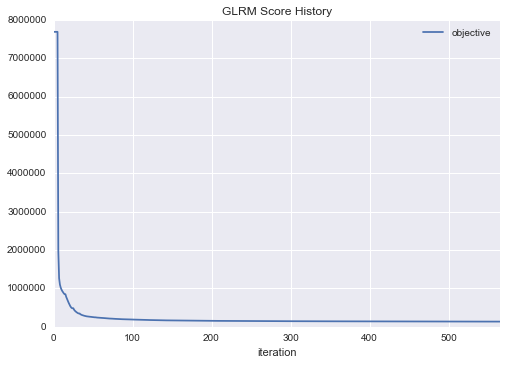

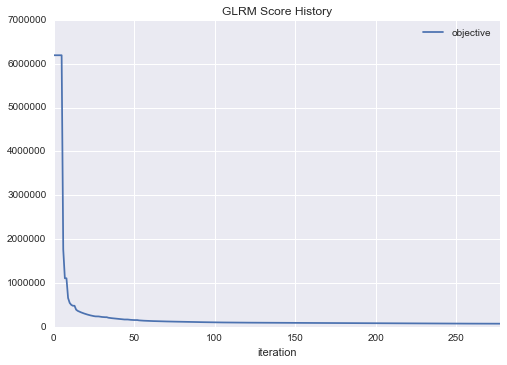

In [14]:
train_new_nums = glrm_num_impute('train', train)
test_new_nums = glrm_num_impute('test',test)

In [17]:
def glrm_cat_embed(frame):
    
    """ Helper function for embedding caetgorical variables using GLRM.
    
    :param frame: H2OFrame to be embedded.
    :return: H2OFrame of embedded categorical features.
    
    """
    
    # initialize GLRM
    cat_embed_glrm = H2OGeneralizedLowRankEstimator(
        k=10,
        transform='STANDARDIZE',
        loss='Quadratic',
        regularization_x='Quadratic',
        regularization_y='L1',
        gamma_x=0.25,
        gamma_y=0.5)

    # train GLRM
    cat_embed_glrm.train(training_frame=frame, x=cats)

    # plot iteration history to ensure convergence
    #cat_embed_glrm.score_history().plot(x='iteration', y='objective', title='GLRM Score History')

    # extracted embedded features
    cat_embed = h2o.get_frame(cat_embed_glrm._model_json['output']['representation_name'])
    
    return cat_embed

In [18]:
train_cat_embed = glrm_cat_embed(train)

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_911bd9ea8a54aa70a635897f28124233> was cancelled by the user.

In [123]:
from sklearn.preprocessing import Imputer

In [125]:
imputed_embedded_train.shape #combined inputed and id and target

(90275, 28)

In [126]:
imp = Imputer(missing_values='NaN', strategy='mode', axis=0)

In [128]:
tr=training_frame.as_data_frame(use_pandas=True)

In [20]:
train, valid = train.split_frame([0.7], seed=12345)

In [21]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    """ Applies simple target encoding to categorical variables.

    :param training_frame: Training frame which to create target means and to be encoded.
    :param test_frame: Test frame to be encoded using information from training frame.
    :param x: Name of input variable to be encoded.
    :param y: Name of target variable to use for encoding.
    :param lambda_: Balance between level mean and overall mean for small groups.
    :param threshold: Number below which a level is considered small enough to be shrunken.
    :param test: Whether or not to print the row_val_dict for testing purposes.
    :return: Tuple of encoded variable from train and test set as H2OFrames.

    """

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)

In [23]:
total = len(cats)
for i, var in enumerate(cats):
    
    tr_enc, _ = target_encoder(train, test, var, 'logerror')
    v_enc, ts_enc = target_encoder(valid, test, var, 'logerror')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

KeyError: nan

In [24]:
# one-hot encode training frame
train_cats_df = train[cats].as_data_frame()
train_cats_df_dummies = pd.get_dummies(train_cats_df)

# one-hot encode validation frame
valid_cats_df = valid[cats].as_data_frame()
valid_cats_df_dummies = pd.get_dummies(valid_cats_df)

# keep only the same new columns in the encoded new frames
# (they different b/c of different levels in variables)
train_diff_cols = list(set(train_cats_df_dummies.columns) - set(valid_cats_df_dummies.columns))
valid_diff_cols = list(set(valid_cats_df_dummies.columns) - set(train_cats_df_dummies.columns))
train_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)
valid_cats_df_dummies.drop(valid_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in both frames
print(train_cats_df_dummies.shape)
print(valid_cats_df_dummies.shape)
print(all(train_cats_df_dummies.columns == valid_cats_df_dummies.columns))

# one-hot encode test frame
test_cats_df = test[cats].as_data_frame()
test_cats_df_dummies = pd.get_dummies(test_cats_df)

# keep only the same new columns in train and valid encoded frames
# (they different b/c of different levels in variables)
# remove columns in train and valid encoded frames not in encoded test frame
# remember encoded train and valid now have same columns
# so only need to check for train OR valid, not both
train_diff_cols = list(set(train_cats_df_dummies.columns) - set(test_cats_df_dummies.columns))
train_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)
valid_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in encoded train and valid frames
print(train_cats_df_dummies.shape)
print(valid_cats_df_dummies.shape)
print(all(train_cats_df_dummies.columns == valid_cats_df_dummies.columns))

# now remove columns in encoded test not in encoded train and valid
# (they different b/c of different levels in variables)
train_diff_cols = list(set(test_cats_df_dummies.columns) - set(train_cats_df_dummies.columns))
test_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in all encoded frames
print(train_cats_df_dummies.shape)
print(valid_cats_df_dummies.shape)
print(test_cats_df_dummies.shape)
print(all(train_cats_df_dummies.columns == valid_cats_df_dummies.columns) and all(valid_cats_df_dummies.columns == test_cats_df_dummies.columns))

# convert to h2o
train_one_hot = h2o.H2OFrame(train_cats_df_dummies.as_matrix())
train_one_hot.columns = list(train_cats_df_dummies.columns)
train = train.cbind(train_one_hot)

valid_one_hot = h2o.H2OFrame(valid_cats_df_dummies.as_matrix())
valid_one_hot.columns = list(valid_cats_df_dummies.columns)
valid = valid.cbind(valid_one_hot)

test_one_hot = h2o.H2OFrame(test_cats_df_dummies.as_matrix())
test_one_hot.columns = list(test_cats_df_dummies.columns)
test = test.cbind(test_one_hot)

(44179, 1026)
(19007, 1026)
True
(44179, 919)
(19007, 919)
True
(44179, 919)
(19007, 919)
(27089, 919)
True


In [25]:
train.describe()

Rows:44179
Cols:969




parcelid logerror transactiondate airconditioningtypeid bathroomcnt bedroomcnt buildingqualitytypeid calculatedbathnbr finishedfloor1squarefeet calculatedfinishedsquarefeet finishedsquarefeet12 finishedsquarefeet15 finishedsquarefeet50 fips fireplacecnt fullbathcnt garagecarcnt garagetotalsqft hashottuborspa heatingorsystemtypeid latitude longitude lotsizesquarefeet poolcnt poolsizesum pooltypeid10 pooltypeid2 pooltypeid7 propertycountylandusecode propertylandusetypeid propertyzoningdesc rawcensustractandblock regionidcity regionidcounty regionidneighborhood regionidzip roomcnt threequarterbathnbr unitcnt yardbuildingsqft17 yearbuilt numberofstories structuretaxvaluedollarcnt taxvaluedollarcnt assessmentyear landtaxvaluedollarcnt taxamount taxdelinquencyflag taxdelinquencyyear censustractandblock airconditioningtypeid0 finishedfloor1squarefeet0 poolcnt0 finishedsquarefeet500 pooltypeid70 threequarterbathnbr0 garagetotalsqft0 taxdelinquencyyear0 garagecarcnt0 pooltypeid100 pooltypeid20 finishedsquarefeet150 regionidneighborhood0 yardbuildingsqft170 numberofstories0 fireplacecnt0 poolsizesum0 hashottuborspa_True taxdelinquencyflag_Y propertyzoningdesc_1NR1* propertyzoningdesc_AHR110000* propertyzoningdesc_AHR17000* propertyzoningdesc_AHR17500* propertyzoningdesc_AHR26250* propertyzoningdesc_AHR3* propertyzoningdesc_AHR335U* propertyzoningdesc_AHRA20000* propertyzoningdesc_AHRPD10* propertyzoningdesc_AHRPD10000 propertyzoningdesc_AHRPD51U* propertyzoningdesc_AHRPD70005 propertyzoningdesc_AHRPD70006 propertyzoningdesc_AHRPD75009 propertyzoningdesc_ALCBD/DRD* propertyzoningdesc_ALR1* propertyzoningdesc_ALR1YY propertyzoningdesc_ALRPD* propertyzoningdesc_ARR0YY propertyzoningdesc_ARR1* propertyzoningdesc_ARR110000D propertyzoningdesc_ARR11000D* propertyzoningdesc_ARR1D* propertyzoningdesc_ARR1YY propertyzoningdesc_ARR2* propertyzoningdesc_ARR2YY propertyzoningdesc_ARR3* propertyzoningdesc_ARR3HY propertyzoningdesc_ARR3YY propertyzoningdesc_ARROD* propertyzoningdesc_ATA10000* propertyzoningdesc_ATMR propertyzoningdesc_ATMRV* propertyzoningdesc_ATR16000* propertyzoningdesc_AVR3* propertyzoningdesc_AVU* propertyzoningdesc_AZCFR3BC2* propertyzoningdesc_AZFS* propertyzoningdesc_AZP1D* propertyzoningdesc_AZR1 propertyzoningdesc_AZR1AY propertyzoningdesc_AZR1C* propertyzoningdesc_AZR1C6000* propertyzoningdesc_AZR1CY propertyzoningdesc_AZR1YY propertyzoningdesc_AZR3A* propertyzoningdesc_AZR3B* propertyzoningdesc_AZR3B-CF* propertyzoningdesc_AZR3C* propertyzoningdesc_AZR3C1200* propertyzoningdesc_AZRZ propertyzoningdesc_AZW* propertyzoningdesc_BFA1* propertyzoningdesc_BFA106 propertyzoningdesc_BFCG* propertyzoningdesc_BFER3* propertyzoningdesc_BFR1* propertyzoningdesc_BFR105 propertyzoningdesc_BFR15000* propertyzoningdesc_BFR16000* propertyzoningdesc_BFR1YY propertyzoningdesc_BFR2* propertyzoningdesc_BFR2PD* propertyzoningdesc_BFR3* propertyzoningdesc_BGR3* propertyzoningdesc_BGR3PD* propertyzoningdesc_BHR1* propertyzoningdesc_BHR1YY propertyzoningdesc_BHR4* propertyzoningdesc_BHR475 propertyzoningdesc_BHR4YY propertyzoningdesc_BLR3* propertyzoningdesc_BLR3YY propertyzoningdesc_BPR1* propertyzoningdesc_BPR3 propertyzoningdesc_BPR3* propertyzoningdesc_BPRG* propertyzoningdesc_BUR1* propertyzoningdesc_BUR1HY propertyzoningdesc_BUR1YY propertyzoningdesc_BUR2* propertyzoningdesc_BUR3* propertyzoningdesc_BUR4* propertyzoningdesc_BUR4-C2-C3 propertyzoningdesc_CA&MUR&D* propertyzoningdesc_CARM12U&D* propertyzoningdesc_CARM18U&D* propertyzoningdesc_CARM25U&D* propertyzoningdesc_CARS* propertyzoningdesc_CASP-4* propertyzoningdesc_CASP-9* propertyzoningdesc_CCPD* propertyzoningdesc_CCR1* propertyzoningdesc_CCR1YY propertyzoningdesc_CCR2* propertyzoningdesc_CCR2YY propertyzoningdesc_CCR3* propertyzoningdesc_CCR4YY propertyzoningdesc_CEADP11 propertyzoningdesc_CEADP3 propertyzoningdesc_CEADP4 propertyzoningdesc_CEADP6 propertyzoningdesc_CERM propertyzoningdesc_CERS5000 propertyzoningdesc_CERS6500 propertyzoningdesc_CLHC propertyzoningdesc_CLHC* property

In [28]:
def feature_combiner(training_frame, test_frame, nums):
    
    """ Combines numeric features using simple arithmatic operations.
    
    :param training_frame: Training frame from which to generate features and onto which generated 
                           feeatures will be cbound.
    :param test_frame: Test frame from which to generate features and onto which generated 
                       feeatures will be cbound.
    :param nums: List of original numeric features from which to generate combined features.
    
    """

    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame

In [26]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['propertyzoningdesc_PDRPD15U*', 'propertyzoningdesc_PDRPD-1-12', 'propertyzoningdesc_LNR3YY', 'propertyzoningdesc_PSR6', 'propertyzoningdesc_ESR3', 'propertyzoningdesc_SHCTC*', 'propertyzoningdesc_DOR3-P*', 'propertyzoningdesc_LAA2', 'propertyzoningdesc_ALR1*', 'propertyzoningdesc_CUR03000*', 'propertyzoningdesc_LKRAYY', 'propertyzoningdesc_WHR172', 'propertyzoningdesc_LR7OOO*', 'propertyzoningdesc_LKMFR*', 'propertyzoningdesc_RMR2*', 'propertyzoningdesc_LPR1YY', 'propertyzoningdesc_LBPD', 'propertyzoningdesc_LRRA7000*', 'propertyzoningdesc_LRR1*', 'propertyzoningdesc_LAM3', 'propertyzoningdesc_LCA1YY', 'propertyzoningdesc_LCRPD1OOOO', 'propertyzoningdesc_LOR17000*', 'propertyzoningdesc_HGR1*', 'propertyzoningdesc_AHR335U*', 'propertyzoningdesc_RPRS20000*', 'propertyzoningdesc_LBR1M', 'propertyzoningdesc_GDR3', 'propertyzoningdesc_WASP1*', 'propertyzoningdesc_AVU*', 'propertyzoningdesc_PAR1YY', 'propertyzoningdesc_PVR1YY', 'propertyzoningdesc_CARM25U&D*', 'propertyzoningdesc



Categorical = ['threequarterbathnbr0', 'garagetotalsqft0', 'threequarterbathnbr', 'garagetotalsqft', 'finishedsquarefeet500', 'pooltypeid7', 'regionidneighborhood', 'airconditioningtypeid0', 'fireplacecnt', 'numberofstories', 'pooltypeid20', 'finishedfloor1squarefeet0', 'finishedsquarefeet50', 'garagecarcnt', 'taxdelinquencyyear0', 'yardbuildingsqft170', 'poolsizesum', 'pooltypeid10', 'taxdelinquencyflag', 'pooltypeid100', 'finishedfloor1squarefeet', 'garagecarcnt0', 'pooltypeid70', 'poolsizesum0', 'poolcnt0', 'airconditioningtypeid', 'hashottuborspa', 'taxdelinquencyyear', 'numberofstories0', 'fireplacecnt0', 'regionidneighborhood0', 'propertyzoningdesc', 'finishedsquarefeet15', 'pooltypeid2', 'finishedsquarefeet150', 'poolcnt', 'yardbuildingsqft17']


In [29]:
train, _ = feature_combiner(train, test, encoded_nums)
valid, test = feature_combiner(valid, test, encoded_nums)

Combining: propertyzoningdesc_PDRPD15U* (1/929) ...
Combining: propertyzoningdesc_PDRPD-1-12 (2/929) ...


KeyboardInterrupt: 

In [39]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
from h2o.grid.grid_search import H2OGridSearch 

In [30]:
h2o.show_progress()       

In [40]:
def glm_grid(X, y, train, valid):
    
    """ Wrapper function for penalized GLM with alpha and lambda search.
    
    :param X: List of inputs.
    :param y: Name of target variable.
    :param train: Name of training H2OFrame.
    :param valid: Name of validation H2OFrame.
    :return: Best H2Omodel from H2OGeneralizedLinearEstimator

    """
    
    alpha_opts = [0.01, 0.25, 0.5, 0.99] # always keep some L2
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(
            family="gaussian",
            lambda_search=True,
            seed=12345),
        hyper_params=hyper_parameters)
    
    # train grid
    grid.train(y=y,
               x=X, 
               training_frame=train,
               validation_frame=valid)

    # show grid search results
    print(grid.show())

    best = grid.get_grid()[0]
    print(best)
    
    # plot top frame values
    yhat_frame = valid.cbind(best.predict(valid))
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')
    
    # select best model
    return best

In [33]:
half_train, other_half_train = train.split_frame([0.5], seed=12345)
half_valid, other_half_valid = valid.split_frame([0.5], seed=12345)
print(half_train.shape)
print(half_valid.shape)
print(other_half_train.shape)
print(other_half_valid.shape)

(22068, 969)
(9562, 969)
(22111, 969)
(9445, 969)


glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.01]  Grid_GLM_py_23_sid_ac2c_model_python_1498689887404_26_model_0   
1    [0.25]  Grid_GLM_py_23_sid_ac2c_model_python_1498689887404_26_model_1   
2     [0.5]  Grid_GLM_py_23_sid_ac2c_model_python_1498689887404_26_model_2   
3    [0.99]  Grid_GLM_py_23_sid_ac2c_model_python_1498689887404_26_model_3   

    residual_deviance  
0  249.49436780089678  
1  249.57636302097487  
2  249.57638247810837  
3  249.57639349078207  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_23_sid_ac2c_model_python_1498689887404_26_model_0


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.026762657453133748
RMSE: 0.16359296272497098
MAE: 0.06970128216758013
RMSLE: NaN
R^2: 0.0069881161730979136
Mean Residual Deviance: 0.026762657453133748
Null degrees of freedom: 22067

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-29 16:49:03,0.000 sec,0,.87E0,2,0.0269425,0.0261009
,2017-06-29 16:49:04,0.094 sec,0,.79E0,2,0.0269345,0.0261009
,2017-06-29 16:49:04,0.179 sec,0,.72E0,2,0.0269271,0.0261011
,2017-06-29 16:49:04,0.216 sec,0,.66E0,3,0.0269188,0.0261017
,2017-06-29 16:49:04,0.260 sec,0,.6E0,6,0.0269056,0.0261020
---,---,---,---,---,---,---,---
,2017-06-29 16:49:11,7.743 sec,0,.14E-3,859,0.0257628,0.0271209
,2017-06-29 16:49:11,7.805 sec,0,.13E-3,860,0.0257627,0.0271214
,2017-06-29 16:49:11,7.862 sec,0,.11E-3,860,0.0257627,0.0271219
,2017-06-29 16:49:11,7.917 sec,0,.1E-3,860,0.0257627,0.0271224



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


logerror,predict
-0.005,0.011787
0.3825,0.00940498
0.0344,0.00955391
-0.006,0.0109536
0.2119,0.0122977
0.0109,0.0111097
0.0296,0.00859916
-0.044,0.00926933
-0.1997,0.0119741
0.0526,0.00772527


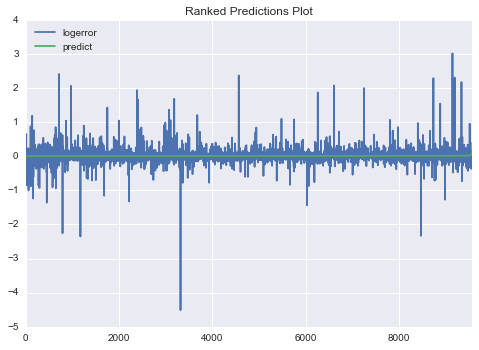

In [41]:
glm_0 = glm_grid(encoded_nums, 'logerror', half_train, half_valid)
#gen_submission(glm_0) # Valid RMSE: ~0.1217,  0.13886 on public leaderboard

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                      model_ids  \
0    [0.25]  Grid_GLM_py_25_sid_ac2c_model_python_1498689887404_27_model_1   
1     [0.5]  Grid_GLM_py_25_sid_ac2c_model_python_1498689887404_27_model_2   
2    [0.99]  Grid_GLM_py_25_sid_ac2c_model_python_1498689887404_27_model_3   
3    [0.01]  Grid_GLM_py_25_sid_ac2c_model_python_1498689887404_27_model_0   

    residual_deviance  
0  252.58436051705172  
1   252.5844543423663  
2  252.58450808247616  
3  252.58644943895155  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_25_sid_ac2c_model_python_1498689887404_27_model_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.024109214076669185
RMSE: 0.15527142066932081
MAE: 0.06748645914958866
RMSLE: NaN
R^2: 0.0013166125771810755
Mean Residual Deviance: 0.024109214076669185
Null degrees of freedom: 22110

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-29 16:53:26,0.000 sec,0,.38E-1,3,0.0241092,0.0267427
,2017-06-29 16:53:26,0.016 sec,0,.34E-1,3,0.0240797,0.0267458
,2017-06-29 16:53:26,0.034 sec,0,.31E-1,3,0.0240549,0.0267529
,2017-06-29 16:53:26,0.051 sec,0,.29E-1,4,0.0240337,0.0267630
,2017-06-29 16:53:26,0.070 sec,0,.26E-1,5,0.0240013,0.0267702
---,---,---,---,---,---,---,---
,2017-06-29 16:53:30,3.813 sec,0,.6E-5,862,0.0229385,0.0276367
,2017-06-29 16:53:30,3.862 sec,0,.55E-5,863,0.0229385,0.0276368
,2017-06-29 16:53:30,3.913 sec,0,.5E-5,863,0.0229385,0.0276370
,2017-06-29 16:53:30,3.964 sec,0,.45E-5,863,0.0229384,0.0276371



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


logerror,predict
0.0149,0.0116342
0.1151,0.0116342
-0.044,0.0116342
0.001,0.0116342
0.0411,0.0116342
-0.0408,0.0116342
0.0159,0.0116342
0.076,0.0116342
0.0286,0.0116342
0.0344,0.0116342


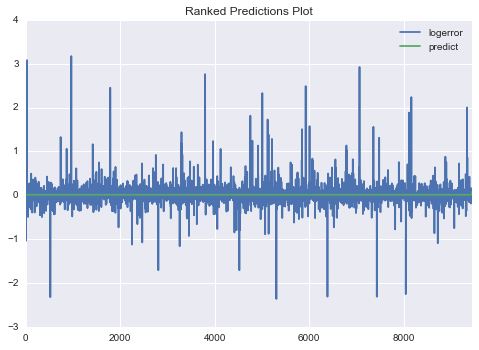

In [43]:
glm_1 = glm_grid(encoded_nums, 'logerror', other_half_train, other_half_valid)


In [44]:
h2o_xgb_model = H2OXGBoostEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# execute training 
h2o_xgb_model.train(x=encoded_nums,
                    y='logerror',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_xgb_model)
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
#ranked_preds_plot('SalePrice', valid, h2o_xgb_preds1_val) 
#h2o_xgb_preds1_test = h2o_xgb_model.predict(test)
#gen_submission(h2o_xgb_preds1_test) # 0.16494 on public leaderboard

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1498689887404_28


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.02138616412087472
RMSE: 0.1462400906758291
MAE: 0.0691209146688942
RMSLE: NaN
Mean Residual Deviance: 0.02138616412087472

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.026938400539863336
RMSE: 0.16412921903141847
MAE: 0.07360167325613454
RMSLE: NaN
Mean Residual Deviance: 0.026938400539863336

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.02608369306202321
RMSE: 0.1615044676224878
MAE: 0.07515131045221382
RMSLE: NaN
Mean Residual Deviance: 0.02608369306202321
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0751509,0.0001174,0.0753392,0.0751782,0.0749354
mean_residual_deviance,0.0260817,0.0006565,0.0258398,0.0250850,0.0273204
mse,0.0260817,0.0006565,0.0258398,0.0250850,0.0273204
r2,-0.0213715,0.0036753,-0.0191146,-0.0285583,-0.0164417
residual_deviance,0.0260817,0.0006565,0.0258398,0.0250850,0.0273204
rmse,0.1614729,0.0020264,0.1607477,0.1583824,0.1652887
rmsle,0.0,NaN,NaN,NaN,NaN


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-29 17:12:13,17 min 7.712 sec,0.0,0.5142919,0.4969370,0.2644961,0.5142129,0.4966487,0.2644149
,2017-06-29 17:12:15,17 min 9.955 sec,1.0,0.5119650,0.4945318,0.2621081,0.5118911,0.4942450,0.2620325
,2017-06-29 17:12:15,17 min 10.020 sec,2.0,0.5096556,0.4921453,0.2597488,0.5095854,0.4918575,0.2596772
,2017-06-29 17:12:15,17 min 10.084 sec,3.0,0.5073669,0.4897783,0.2574212,0.5073027,0.4894928,0.2573561
,2017-06-29 17:12:15,17 min 10.145 sec,4.0,0.5050854,0.4874164,0.2551113,0.5050255,0.4871330,0.2550508
---,---,---,---,---,---,---,---,---,---
,2017-06-29 17:15:19,20 min 14.039 sec,3520.0,0.1526912,0.0689467,0.0233146,0.1624515,0.0709643,0.0263905
,2017-06-29 17:16:27,21 min 21.516 sec,4773.0,0.1512764,0.0690812,0.0228846,0.1627838,0.0715695,0.0264986
,2017-06-29 17:18:06,23 min 1.233 sec,6416.0,0.1495673,0.0691435,0.0223704,0.1632695,0.0722799,0.0266569
,2017-06-29 17:21:10,26 min 4.931 sec,9748.0,0.1464547,0.0691254,0.0214490,0.1641019,0.0735399,0.0269294



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
structuretaxvaluedollarcnt,12062.0,1.0,0.1174935
calculatedfinishedsquarefeet,8312.0,0.6891063,0.0809655
taxamount,7685.0,0.6371249,0.0748580
lotsizesquarefeet,7060.0,0.5853092,0.0687700
yearbuilt,6734.0,0.5582822,0.0655945
---,---,---,---
propertyzoningdesc_LCR171/2,1.0,0.0000829,0.0000097
propertyzoningdesc_LCA106,1.0,0.0000829,0.0000097
propertyzoningdesc_LRRA7500*,1.0,0.0000829,0.0000097
propertyzoningdesc_LAC2(PV),1.0,0.0000829,0.0000097



See the whole table with table.as_data_frame()

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [129]:
tr['finishedsquarefeet6'].fillna(tr['finishedsquarefeet6'].value_counts().index[0],inplace=True)

KeyError: 'finishedsquarefeet6'

In [101]:
tr['buildingclasstypeid'].fillna(tr['buildingclasstypeid'].value_counts().index[0],inplace=True)
tr['pooltypeid2'].fillna(tr['pooltypeid2'].value_counts().index[0],inplace=True)
tr['taxdelinquencyyear'].fillna(tr['taxdelinquencyyear'].value_counts().index[0],inplace=True)
tr['poolcnt'].fillna(tr['poolcnt'].value_counts().index[0],inplace=True)
tr['basementsqft'].fillna(tr['basementsqft'].value_counts().index[0],inplace=True)
tr['taxdelinquencyflag'].fillna(tr['taxdelinquencyflag'].value_counts().index[0],inplace=True)
tr['fireplacecnt'].fillna(tr['fireplacecnt'].value_counts().index[0],inplace=True)
tr['typeconstructiontypeid'].fillna(tr['typeconstructiontypeid'].value_counts().index[0],inplace=True)
tr['poolsizesum'].fillna(tr['poolsizesum'].value_counts().index[0],inplace=True)
tr['numberofstories'].fillna(tr['numberofstories'].value_counts().index[0],inplace=True)
tr['garagetotalsqft'].fillna(tr['garagetotalsqft'].value_counts().index[0],inplace=True)
tr['yardbuildingsqft26'].fillna(tr['yardbuildingsqft26'].value_counts().index[0],inplace=True)
tr['airconditioningtypeid'].fillna(tr['airconditioningtypeid'].value_counts().index[0],inplace=True)
tr['pooltypeid7'].fillna(tr['pooltypeid7'].value_counts().index[0],inplace=True)
tr['finishedsquarefeet13'].fillna(tr['finishedsquarefeet13'].value_counts().index[0],inplace=True)
tr['hashottuborspa'].fillna(tr['hashottuborspa'].value_counts().index[0],inplace=True)
tr['regionidneighborhood'].fillna(tr['regionidneighborhood'].value_counts().index[0],inplace=True)

In [102]:
tr['architecturalstyletypeid'].fillna(tr['architecturalstyletypeid'].value_counts().index[0],inplace=True)
tr['decktypeid'].fillna(tr['decktypeid'].value_counts().index[0],inplace=True)
tr['garagecarcnt'].fillna(tr['garagecarcnt'].value_counts().index[0],inplace=True)
tr['propertyzoningdesc'].fillna(tr['propertyzoningdesc'].value_counts().index[0],inplace=True)
tr['finishedfloor1squarefeet'].fillna(tr['finishedfloor1squarefeet'].value_counts().index[0],inplace=True)
tr['finishedsquarefeet50'].fillna(tr['finishedsquarefeet50'].value_counts().index[0],inplace=True)
tr['pooltypeid10'].fillna(tr['pooltypeid10'].value_counts().index[0],inplace=True)
tr['threequarterbathnbr'].fillna(tr['threequarterbathnbr'].value_counts().index[0],inplace=True)
tr['fireplaceflag'].fillna(tr['fireplaceflag'].value_counts().index[0],inplace=True)
tr['storytypeid'].fillna(tr['storytypeid'].value_counts().index[0],inplace=True)
tr['finishedsquarefeet15'].fillna(tr['finishedsquarefeet15'].value_counts().index[0],inplace=True)

In [104]:
tr=h2o.H2OFrame(tr)

In [ ]:
# one-hot encode training frame
train_cats_df = train[cats].as_data_frame()
train_cats_df_dummies = pd.get_dummies(train_cats_df)


# keep only the same new columns in the encoded new frames
# (they different b/c of different levels in variables)
train_diff_cols = list(set(train_cats_df_dummies.columns) - set(valid_cats_df_dummies.columns))
#valid_diff_cols = list(set(valid_cats_df_dummies.columns) - set(train_cats_df_dummies.columns))
train_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)
#valid_cats_df_dummies.drop(valid_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in both frames
print(train_cats_df_dummies.shape)

# one-hot encode test frame
#test_cats_df = test[cats].as_data_frame()
#test_cats_df_dummies = pd.get_dummies(test_cats_df)

# keep only the same new columns in train and valid encoded frames
# (they different b/c of different levels in variables)
# remove columns in train and valid encoded frames not in encoded test frame
# remember encoded train and valid now have same columns
# so only need to check for train OR valid, not both
#train_diff_cols = list(set(train_cats_df_dummies.columns) - set(test_cats_df_dummies.columns))
#train_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)
#valid_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in encoded train and valid frames
print(train_cats_df_dummies.shape)
#print(valid_cats_df_dummies.shape)
#print(all(train_cats_df_dummies.columns == valid_cats_df_dummies.columns))

# now remove columns in encoded test not in encoded train and valid
# (they different b/c of different levels in variables)
#train_diff_cols = list(set(test_cats_df_dummies.columns) - set(train_cats_df_dummies.columns))
#test_cats_df_dummies.drop(train_diff_cols, axis=1, inplace=True)

# check that columns are actually the same in all encoded frames
print(train_cats_df_dummies.shape)
#print(valid_cats_df_dummies.shape)
#print(test_cats_df_dummies.shape)
p#rint(all(train_cats_df_dummies.columns == valid_cats_df_dummies.columns) and all(valid_cats_df_dummies.columns == test_cats_df_dummies.columns))

# convert to h2o
train_one_hot = h2o.H2OFrame(train_cats_df_dummies.as_matrix())
train_one_hot.columns = list(train_cats_df_dummies.columns)
train = train.cbind(train_one_hot)

#valid_one_hot = h2o.H2OFrame(valid_cats_df_dummies.as_matrix())
#valid_one_hot.columns = list(valid_cats_df_dummies.columns)
#valid = valid.cbind(valid_one_hot)

#test_one_hot = h2o.H2OFrame(test_cats_df_dummies.as_matrix())
#test_one_hot.columns = list(test_cats_df_dummies.columns)
#test = test.cbind(test_one_hot)

In [3]:
excludevars = ['ID','SalePrice']
def get_type_lists(frame, rejects=excludevars):

    """Creates lists of numeric and categorical variables.
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.
    """
    
    nums, cats = [], []
    for key, val in frame.types.items():
        if key not in rejects:
            if val == 'enum':
                cats.append(key)
            else: 
                nums.append(key)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [4]:
original_nums, cats = get_type_lists(trainori)

Numeric = ['OverallCond', 'MasVnrArea', 'OverallQual', 'LotArea', 'FullBath', 'GarageCars', 'Id', 'PoolArea', 'EnclosedPorch', 'WoodDeckSF', 'BedroomAbvGr', '1stFlrSF', 'KitchenAbvGr', 'MiscVal', 'BsmtHalfBath', 'YrSold', 'OpenPorchSF', 'GrLivArea', '3SsnPorch', 'BsmtFinSF1', 'MoSold', 'YearRemodAdd', '2ndFlrSF', 'MSSubClass', 'Fireplaces', 'HalfBath', 'BsmtUnfSF', 'GarageYrBlt', 'ScreenPorch', 'YearBuilt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFullBath', 'GarageArea', 'LowQualFinSF', 'LotFrontage', 'BsmtFinSF2']

Categorical = ['LandSlope', 'KitchenQual', 'BsmtCond', 'GarageType', 'SaleType', 'Exterior1st', 'Utilities', 'Foundation', 'LotConfig', 'Heating', 'MasVnrType', 'MSZoning', 'BsmtExposure', 'BsmtFinType1', 'SaleCondition', 'PavedDrive', 'Street', 'Exterior2nd', 'PoolQC', 'LotShape', 'ExterQual', 'BsmtFinType2', 'CentralAir', 'HeatingQC', 'Functional', 'GarageQual', 'FireplaceQu', 'GarageFinish', 'LandContour', 'Condition2', 'Neighborhood', 'Condition1', 'Electrical', 'GarageCond

## Preprocessing

In [7]:
pandas_train = train.as_data_frame(use_pandas=True) #Convert to Pandas frame
pandas_test = test.as_data_frame(use_pandas=True) 

In [8]:
# Lotfrontage
temp = pandas_train.groupby('Neighborhood', as_index=False)['LotFrontage'].median()
temp = temp.rename(columns={"LotFrontage":"LotFrontage2"})
pandas_train = pd.merge(pandas_train, temp, how='left', on='Neighborhood')
pandas_train['LotFrontage'][pandas_train['LotFrontage'].isnull()] = pandas_train['LotFrontage2'][pandas_train['LotFrontage'].isnull()]
pandas_train = pandas_train.drop('LotFrontage2', axis=1)


temp = pandas_test.groupby('Neighborhood', as_index=False)['LotFrontage'].median()
temp = temp.rename(columns={"LotFrontage":"LotFrontage2"})
pandas_test = pd.merge(pandas_test, temp, how='left', on='Neighborhood')
pandas_test['LotFrontage'][pandas_test['LotFrontage'].isnull()] = pandas_test['LotFrontage2'][pandas_test['LotFrontage'].isnull()]
pandas_test = pandas_test.drop('LotFrontage2', axis=1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# Alley
pandas_train["Alley"].fillna("None", inplace=True)

pandas_test["Alley"].fillna("None", inplace=True)


In [10]:
# MasVnrType, MasVnrArea
pandas_train['MasVnrType'].fillna(pandas_train['MasVnrType'].value_counts().index[0],inplace=True)
pandas_train['MasVnrArea'].fillna(pandas_train['MasVnrArea'].mode()[0],inplace=True)


pandas_test['MasVnrType'].fillna(pandas_train['MasVnrType'].value_counts().index[0],inplace=True)
pandas_test['MasVnrArea'].fillna(pandas_train['MasVnrArea'].mode()[0],inplace=True)

In [11]:
# Basement related

basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']

pandas_train["BsmtQual"].fillna("None", inplace=True)
pandas_train["BsmtCond"].fillna("None", inplace=True)
pandas_train["BsmtExposure"].fillna("None", inplace=True)
pandas_train["BsmtFinType1"].fillna("None", inplace=True)
pandas_train["BsmtFinSF1"].fillna(0, inplace=True)
pandas_train["BsmtFinType2"].fillna("None", inplace=True)
pandas_train["BsmtFinSF2"].fillna(0, inplace=True)
pandas_train["BsmtUnfSF"].fillna(0, inplace=True)

pandas_test["BsmtQual"].fillna("None", inplace=True)
pandas_test["BsmtCond"].fillna("None", inplace=True)
pandas_test["BsmtExposure"].fillna("None", inplace=True)
pandas_test["BsmtFinType1"].fillna("None", inplace=True)
pandas_test["BsmtFinSF1"].fillna(0, inplace=True)
pandas_test["BsmtFinType2"].fillna("None", inplace=True)
pandas_test["BsmtFinSF2"].fillna(0, inplace=True)
pandas_test["BsmtUnfSF"].fillna(0, inplace=True)

In [12]:
pandas_test[basement_cols][pandas_train['BsmtQual'].isnull()==True]

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2


In [13]:
# Electrical
pandas_train["Electrical"].fillna("SBrkr", inplace=True)

pandas_test["Electrical"].fillna("SBrkr", inplace=True)

In [14]:
# FireplaceQu
pandas_train["FireplaceQu"].fillna("None", inplace=True)

pandas_test["FireplaceQu"].fillna("None", inplace=True)

In [15]:
# Garage related
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

pandas_train["GarageType"].fillna("None", inplace=True)
pandas_train["GarageQual"].fillna("None", inplace=True)
pandas_train["GarageCond"].fillna("None", inplace=True)
pandas_train["GarageFinish"].fillna("None", inplace=True)
pandas_train["GarageCars"].fillna(0, inplace=True)
pandas_train["GarageArea"].fillna(0, inplace=True)

pandas_test["GarageType"].fillna("None", inplace=True)
pandas_test["GarageQual"].fillna("None", inplace=True)
pandas_test["GarageCond"].fillna("None", inplace=True)
pandas_test["GarageFinish"].fillna("None", inplace=True)
pandas_test["GarageCars"].fillna(0, inplace=True)
pandas_test["GarageArea"].fillna(0, inplace=True)

In [16]:
# GarageYrBlt Binning

minval = pandas_train['GarageYrBlt'].min()
maxval = pandas_train['GarageYrBlt'].max()+1
binlist=[0,minval,1920,1940,1960,1980,2000,maxval]
pandas_train['GarageYrBlt'].fillna(0,inplace=True)
pandas_train['GarageYrBltBins'] = pd.cut(pandas_train['GarageYrBlt'],binlist,include_lowest=True,right=False)

minval = pandas_test['GarageYrBlt'].min()
maxval = pandas_test['GarageYrBlt'].max()+1
binlist=[0,minval,1920,1940,1960,1980,2000,maxval]
pandas_test['GarageYrBlt'].fillna(0,inplace=True)
pandas_test['GarageYrBltBins'] = pd.cut(pandas_test['GarageYrBlt'],binlist,include_lowest=True,right=False)

In [17]:
# PoolQC
pandas_train["PoolQC"].fillna("None", inplace=True)

pandas_test["PoolQC"].fillna("None", inplace=True)

In [18]:
# Fence, MiscFeature

pandas_train["Fence"].fillna("None", inplace=True)
pandas_train["MiscFeature"].fillna("None", inplace=True)

pandas_test["Fence"].fillna("None", inplace=True)
pandas_test["MiscFeature"].fillna("None", inplace=True)

In [19]:
def show_missing(pandas_frame):
    missing = pandas_frame.columns[pandas_frame.isnull().any()].tolist()
    return missing

In [20]:
show_missing(pandas_train)

[]

In [21]:
show_missing(pandas_test) # 나중에 처리해야..

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'SaleType']

In [22]:
train_h2o = h2o.H2OFrame(pandas_train) #Convert back to H2O frame 
test_h2o = h2o.H2OFrame(pandas_test)

### Set categorical vars

In [23]:
train_h2o['MSSubClass'] = train_h2o['MSSubClass'].asfactor()
train_h2o['OverallQual'] = train_h2o['OverallQual'].asfactor()
train_h2o['OverallCond'] = train_h2o['OverallCond'].asfactor()
train_h2o['YearBuilt'] = train_h2o['YearBuilt'].asfactor()
train_h2o['YearRemodAdd'] = train_h2o['YearRemodAdd'].asfactor()
#train_h2o['GarageYrBlt'] = train_h2o['GarageYrBlt'].asfactor()
train_h2o['MoSold'] = train_h2o['MoSold'].asfactor()
train_h2o['YrSold'] = train_h2o['YrSold'].asfactor()

test_h2o['MSSubClass'] = test_h2o['MSSubClass'].asfactor()
test_h2o['OverallQual'] = test_h2o['OverallQual'].asfactor()
test_h2o['OverallCond'] = test_h2o['OverallCond'].asfactor()
test_h2o['YearBuilt'] = test_h2o['YearBuilt'].asfactor()
test_h2o['YearRemodAdd'] = test_h2o['YearRemodAdd'].asfactor()
#test_h2o['GarageYrBlt'] = test_h2o['GarageYrBlt'].asfactor()
test_h2o['MoSold'] = test_h2o['MoSold'].asfactor()
test_h2o['YrSold'] = test_h2o['YrSold'].asfactor()

In [24]:
excludevars = ['Id','SalePrice', 'GarageYrBltBins2','GarageYrBlt']
nums_afterpp, cats_afterpp = get_type_lists(train_h2o, excludevars)

Numeric = ['MasVnrArea', 'LotArea', 'FullBath', 'GarageCars', 'PoolArea', 'EnclosedPorch', 'WoodDeckSF', 'BedroomAbvGr', '1stFlrSF', 'KitchenAbvGr', 'MiscVal', 'BsmtHalfBath', 'OpenPorchSF', 'GrLivArea', '3SsnPorch', 'BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'HalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtFullBath', 'GarageArea', 'LowQualFinSF', 'LotFrontage', 'BsmtFinSF2', 'ScreenPorch']

Categorical = ['OverallCond', 'LandSlope', 'KitchenQual', 'BsmtCond', 'OverallQual', 'GarageType', 'SaleType', 'Exterior1st', 'Utilities', 'Foundation', 'LotConfig', 'Heating', 'MasVnrType', 'MSZoning', 'BsmtExposure', 'BsmtFinType1', 'SaleCondition', 'YrSold', 'MoSold', 'YearRemodAdd', 'PavedDrive', 'MSSubClass', 'Street', 'Exterior2nd', 'PoolQC', 'LotShape', 'ExterQual', 'BsmtFinType2', 'CentralAir', 'HeatingQC', 'Functional', 'GarageQual', 'GarageYrBltBins', 'FireplaceQu', 'GarageFinish', 'YearBuilt', 'LandContour', 'Condition2', 'Neighborhood', 'Condition1', 'Electrical', 'GarageCond',

In [25]:
train, valid = train_h2o.split_frame([0.7], seed=12345)
test = test_h2o
print(train.shape)
print(valid.shape)

(1001, 82)
(459, 82)


In [26]:
train.describe()

Rows:1001
Cols:82




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltBins
type,int,enum,enum,real,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,int,enum,int,int,int,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,enum,int,enum,int,enum,enum,int,enum,int,int,enum,enum,enum,int,int,int,int,int,int,enum,enum,enum,int,enum,enum,enum,enum,int,enum
mins,1.0,,,21.0,1300.0,,,,,,,,,,,,,,,,,,,,,,0.0,,,,,,,,0.0,,0.0,0.0,0.0,,,,,480.0,0.0,0.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,,3.0,,0.0,,,0.0,,0.0,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,,,0.0,,,,,34900.0,
mean,724.8291708291705,,,70.74475524475535,10628.262737262736,,,,,,,,,,,,,,,,,,,,,,106.16383616383624,,,,,,,,445.5994005994004,,41.64935064935064,575.9900099900102,1063.2387612387604,,,,,1172.088911088912,341.78721278721247,5.9250749250749255,1519.8011988011988,0.4265734265734266,0.05994005994005996,1.5744255744255726,0.381618381618382,2.8711288711288696,1.0469530469530457,,6.512487512487514,,0.6203796203796214,,,1883.850149850151,,1.7932067932067925,477.4685314685315,,,,91.07392607392609,44.92407592407593,21.257742257742255,3.4565434565434567,14.763236763236765,3.376623376623376,,,,39.684315684315685,,,,,182171.95904095893,
maxs,1460.0,,,313.0,164660.0,,,,,,,,,,,,,,,,,,,,,,1378.0,,,,,,,,5644.0,,1127.0,2153.0,6110.0,,,,,4692.0,2065.0,528.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,,14.0,,3.0,,,2010.0,,4.0,1418.0,,,,736.0,523.0,552.0,508.0,440.0,738.0,,,,15500.0,,,,,755000.0,
sigma,421.4954943866087,,,23.15278676455676,9442.37310711137,,,,,,,,,,,,,,,,,,,,,,179.66239765423683,,,,,,,,467.17326588712297,,148.91838678308972,444.45750741786287,450.4683539784607,,,,,392.4739572085174,432.9085950594231,49.51948485817861,520.2774292995629,0.5204355357324734,0.2457714312193271,0.5538098001166959,0.5002217290580031,0.8052177496650357,0.22537348289718281,,1.587480364002624,,0.6416730131026673,,,423.68187301615546,,0.7349787794173421,209.92257920181268,,,,120.05044160464608,63.01874506660877,61.04442237008644,29.83605804459362,54.16981527671003,43.98791894358055,,,,516.2493547150991,,,,,80367.94618029826,
zeros,0,,,0,0,,,,,,,,,,,,,,,,,,,,,,577,,,,,,,,326,,894,78,25,,,,,0,572,984,0,586,943,6,626,4,1,,0,,466,,,48,,48,48,,,,523,460,867,985,921,995,,,,969,,,,,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,60,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal,208500.0,"[2000, 2011)"
1,2.0,20,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298

In [27]:
def target_encoder(training_frame, test_frame, x, y, lambda_=0.15, threshold=150, test=False):

    """ Applies simple target encoding to categorical variables.

    :param training_frame: Training frame which to create target means and to be encoded.
    :param test_frame: Test frame to be encoded using information from training frame.
    :param x: Name of input variable to be encoded.
    :param y: Name of target variable to use for encoding.
    :param lambda_: Balance between level mean and overall mean for small groups.
    :param threshold: Number below which a level is considered small enough to be shrunken.
    :param test: Whether or not to print the row_val_dict for testing purposes.
    :return: Tuple of encoded variable from train and test set as H2OFrames.

    """

    # convert to pandas
    trdf = training_frame.as_data_frame().loc[:, [x,y]] # df
    tss = test_frame.as_data_frame().loc[:, x]          # series


    # create dictionary of level:encode val

    encode_name = x + '_Tencode'
    overall_mean = trdf[y].mean()
    row_val_dict = {}

    for level in trdf[x].unique():
        level_df = trdf[trdf[x] == level][y]
        level_n = level_df.shape[0]
        level_mean = level_df.mean()
        if level_n >= threshold:
            row_val_dict[level] = level_mean
        else:
            row_val_dict[level] = ((1 - lambda_) * level_mean) +\
                                  (lambda_ * overall_mean)

    row_val_dict[np.nan] = overall_mean # handle missing values

    if test:
        print(row_val_dict)

    # apply the transform to training data
    trdf[encode_name] = trdf[x].apply(lambda i: row_val_dict[i])

    # apply the transform to test data
    tsdf = pd.DataFrame(columns=[x, encode_name])
    tsdf[x] = tss
    tsdf.loc[:, encode_name] = overall_mean # handle previously unseen values
    # handle values that are seen in tsdf but not row_val_dict
    for i, col_i in enumerate(tsdf[x]):
        try:
            row_val_dict[col_i]
        except:
            # a value that appeared in tsdf isn't in the row_val_dict so just
            # make it the overall_mean
            row_val_dict[col_i] = overall_mean
    tsdf[encode_name] = tsdf[x].apply(lambda i: row_val_dict[i])


    # convert back to H2O

    trdf = h2o.H2OFrame(trdf[encode_name].as_matrix())
    trdf.columns = [encode_name]

    tsdf = h2o.H2OFrame(tsdf[encode_name].as_matrix())
    tsdf.columns = [encode_name]

    return (trdf, tsdf)


In [28]:
total = len(cats_afterpp)
for i, var in enumerate(cats_afterpp):
    
    tr_enc, _ = target_encoder(train, test, var, 'SalePrice')
    v_enc, ts_enc = target_encoder(valid, test, var, 'SalePrice')
    
    print('Encoding: ' + var + ' (' + str(i+1) + '/' + str(total) + ') ...')

    train = train.cbind(tr_enc)
    valid = valid.cbind(v_enc)
    test = test.cbind(ts_enc)    
    
print('Done.')

Encoding: OverallCond (1/51) ...
Encoding: LandSlope (2/51) ...
Encoding: KitchenQual (3/51) ...
Encoding: BsmtCond (4/51) ...
Encoding: OverallQual (5/51) ...
Encoding: GarageType (6/51) ...
Encoding: SaleType (7/51) ...
Encoding: Exterior1st (8/51) ...
Encoding: Utilities (9/51) ...
Encoding: Foundation (10/51) ...
Encoding: LotConfig (11/51) ...
Encoding: Heating (12/51) ...
Encoding: MasVnrType (13/51) ...
Encoding: MSZoning (14/51) ...
Encoding: BsmtExposure (15/51) ...
Encoding: BsmtFinType1 (16/51) ...
Encoding: SaleCondition (17/51) ...
Encoding: YrSold (18/51) ...
Encoding: MoSold (19/51) ...
Encoding: YearRemodAdd (20/51) ...
Encoding: PavedDrive (21/51) ...
Encoding: MSSubClass (22/51) ...
Encoding: Street (23/51) ...
Encoding: Exterior2nd (24/51) ...
Encoding: PoolQC (25/51) ...
Encoding: LotShape (26/51) ...
Encoding: ExterQual (27/51) ...
Encoding: BsmtFinType2 (28/51) ...
Encoding: CentralAir (29/51) ...
Encoding: HeatingQC (30/51) ...
Encoding: Functional (31/51) ...
En

In [29]:
train.describe()

Rows:1001
Cols:133




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltBins,OverallCond_Tencode,LandSlope_Tencode,KitchenQual_Tencode,BsmtCond_Tencode,OverallQual_Tencode,GarageType_Tencode,SaleType_Tencode,Exterior1st_Tencode,Utilities_Tencode,Foundation_Tencode,LotConfig_Tencode,Heating_Tencode,MasVnrType_Tencode,MSZoning_Tencode,BsmtExposure_Tencode,BsmtFinType1_Tencode,SaleCondition_Tencode,YrSold_Tencode,MoSold_Tencode,YearRemodAdd_Tencode,PavedDrive_Tencode,MSSubClass_Tencode,Street_Tencode,Exterior2nd_Tencode,PoolQC_Tencode,LotShape_Tencode,ExterQual_Tencode,BsmtFinType2_Tencode,CentralAir_Tencode,HeatingQC_Tencode,Functional_Tencode,GarageQual_Tencode,GarageYrBltBins_Tencode,FireplaceQu_Tencode,GarageFinish_Tencode,YearBuilt_Tencode,LandContour_Tencode,Condition2_Tencode,Neighborhood_Tencode,Condition1_Tencode,Electrical_Tencode,GarageCond_Tencode,BldgType_Tencode,Fence_Tencode,Alley_Tencode,RoofMatl_Tencode,ExterCond_Tencode,MiscFeature_Tencode,RoofStyle_Tencode,BsmtQual_Tencode,HouseStyle_Tencode
type,int,enum,enum,real,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,int,enum,int,int,int,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,enum,int,enum,int,enum,enum,int,enum,int,int,enum,enum,enum,int,int,int,int,int,int,enum,enum,enum,int,enum,enum,enum,enum,int,enum,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,1.0,,,21.0,1300.0,,,,,,,,,,,,,,,,,,,,,,0.0,,,,,,,,0.0,,0.0,0.0,0.0,,,,,480.0,0.0,0.0,480.0,0.0,0.0,0.0,0.0,0.0,0.0,,3.0,,0.0,,,0.0,,0.0,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,,,,0.0,,,,,34900.0,,116283.85154845155,181486.5182747485,124936.94820396995,84275.79385614385,57340.143856143855,119405.5855228105,125968.29385614385,78325.79385614385,144200.79385614386,121726.89385614387,176473.2899159664,93469.96052281052,156555.86183074262,78614.79385614385,123956.21308691308,121276.42985614385,115832.04385614385,179239.41089108912,171267.6210300569,104035.31885614386,129253.89464979463,110931.40933233431,146350.10385614386,129978.23968947721,181425.2874371859,163944.59385614382,116078.96885614384,126947.55924075923,119608.23368665231,135668.69902855766,110059.12718947718,96813.29385614385,119405.5855228105,141462.34885614386,119405.5855228105,103613.29385614385,145140.16285614387,108075.79385614385,109690.79385614385,134468.29385614386,84275.79385614385,112070.79385614385,138273.46052281052,141306.73814185814,128075.200999001,143775.79385614386,122047.14941169939,140375.79385614386,161577.2224275724,121216.12093947716,118907.22242757239
mean,724.8291708291705,,,70.74475524475535,10628.262737262736,,,,,,,,,,,,,,,,,,,,,,106.16383616383624,,,,,,,,445.5994005994004,,41.64935064935064,575.9900099900102,1063.2387612387604,,,,,1172.088911088912,341.78721278721247,5.9250749250749255,1519.8011988011988,0.4265734265734266,0.05994005994005996,1.5744255744255726,0.381618381618382,2.8711288711288696,1.0469530469530457,,6.512487512487514,,0

In [30]:
encoded_nums, cats = get_type_lists(frame=train)

Numeric = ['MasVnrArea', 'YrSold_Tencode', 'LotArea', 'GarageYrBlt', 'GarageCars', 'BsmtFullBath', 'OpenPorchSF', 'PoolArea', 'CentralAir_Tencode', 'Street_Tencode', 'PavedDrive_Tencode', 'KitchenAbvGr', 'LandContour_Tencode', 'ScreenPorch', 'BsmtHalfBath', 'Fence_Tencode', 'MSZoning_Tencode', '3SsnPorch', 'MSSubClass_Tencode', 'ExterQual_Tencode', '2ndFlrSF', 'Exterior1st_Tencode', 'BldgType_Tencode', 'Condition1_Tencode', 'BsmtUnfSF', 'Condition2_Tencode', 'GarageCond_Tencode', 'OverallCond_Tencode', 'OverallQual_Tencode', 'FireplaceQu_Tencode', 'GarageFinish_Tencode', 'BsmtCond_Tencode', 'SaleCondition_Tencode', 'TotalBsmtSF', 'GarageArea', 'BsmtFinType2_Tencode', 'LowQualFinSF', 'Heating_Tencode', 'Foundation_Tencode', 'HeatingQC_Tencode', 'FullBath', 'Id', 'Utilities_Tencode', 'EnclosedPorch', 'BsmtFinType1_Tencode', 'WoodDeckSF', 'BedroomAbvGr', 'SaleType_Tencode', '1stFlrSF', 'MoSold_Tencode', 'GarageQual_Tencode', 'LotShape_Tencode', 'RoofStyle_Tencode', 'BsmtQual_Tencode', 'Mi

In [33]:
len(encoded_nums)

81

In [34]:
print(train.shape)

(1001, 133)


In [35]:
print('Imputed and encoded numeric training data:')
train[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric validation data:')
valid[encoded_nums].describe() #79 numeric columns w/ no missing
print('--------------------------------------------------------------------------------')
print('Imputed and encoded numeric test data:')
test[encoded_nums].describe() #79 numeric columns w/ no missing

Imputed and encoded numeric training data:
Rows:1001
Cols:81




,MasVnrArea,YrSold_Tencode,LotArea,GarageYrBlt,GarageCars,BsmtFullBath,OpenPorchSF,PoolArea,CentralAir_Tencode,Street_Tencode,PavedDrive_Tencode,KitchenAbvGr,LandContour_Tencode,ScreenPorch,BsmtHalfBath,Fence_Tencode,MSZoning_Tencode,3SsnPorch,MSSubClass_Tencode,ExterQual_Tencode,2ndFlrSF,Exterior1st_Tencode,BldgType_Tencode,Condition1_Tencode,BsmtUnfSF,Condition2_Tencode,GarageCond_Tencode,OverallCond_Tencode,OverallQual_Tencode,FireplaceQu_Tencode,GarageFinish_Tencode,BsmtCond_Tencode,SaleCondition_Tencode,TotalBsmtSF,GarageArea,BsmtFinType2_Tencode,LowQualFinSF,Heating_Tencode,Foundation_Tencode,HeatingQC_Tencode,FullBath,Id,Utilities_Tencode,EnclosedPorch,BsmtFinType1_Tencode,WoodDeckSF,BedroomAbvGr,SaleType_Tencode,1stFlrSF,MoSold_Tencode,GarageQual_Tencode,LotShape_Tencode,RoofStyle_Tencode,BsmtQual_Tencode,MiscFeature_Tencode,GrLivArea,ExterCond_Tencode,BsmtFinSF1,LandSlope_Tencode,Neighborhood_Tencode,Fireplaces,Electrical_Tencode,HalfBath,Alley_Tencode,LotConfig_Tencode,KitchenQual_Tencode,YearRemodAdd_Tencode,MasVnrType_Tencode,GarageType_Tencode,LotFrontage,HouseStyle_Tencode,GarageYrBltBins_Tencode,Exterior2nd_Tencode,TotRmsAbvGrd,RoofMatl_Tencode,BsmtExposure_Tencode,MiscVal,YearBuilt_Tencode,PoolQC_Tencode,BsmtFinSF2,Functional_Tencode
type,int,real,int,int,int,int,int,int,real,real,real,int,real,int,int,real,real,int,real,real,int,real,real,real,int,real,real,real,real,real,real,real,real,int,int,real,int,real,real,real,int,int,real,int,real,int,int,real,int,real,real,real,real,real,real,int,real,int,real,real,int,real,int,real,real,real,real,real,real,real,real,real,real,int,real,real,int,real,real,int,real
mins,0.0,179239.41089108912,1300.0,0.0,0.0,0.0,0.0,0.0,119608.23368665231,146350.10385614386,129253.89464979463,0.0,145140.16285614387,0.0,0.0,141306.73814185814,78614.79385614385,0.0,110931.40933233431,116078.96885614384,0.0,78325.79385614385,138273.46052281052,134468.29385614386,0.0,108075.79385614385,112070.79385614385,116283.85154845155,57340.143856143855,141462.34885614386,119405.5855228105,84275.79385614385,115832.04385614385,0.0,0.0,126947.55924075923,0.0,93469.96052281052,121726.89385614387,135668.69902855766,0.0,1.0,144200.79385614386,0.0,121276.42985614385,0.0,0.0,125968.29385614385,480.0,171267.6210300569,96813.29385614385,163944.59385614382,161577.2224275724,121216.12093947716,140375.79385614386,480.0,122047.14941169939,0.0,181486.5182747485,109690.79385614385,0.0,84275.79385614385,0.0,128075.200999001,176473.2899159664,124936.94820396995,104035.31885614386,156555.86183074262,119405.5855228105,21.0,118907.22242757239,119405.5855228105,129978.23968947721,3.0,143775.79385614386,123956.21308691308,0.0,103613.29385614385,181425.2874371859,0.0,110059.12718947718
mean,106.16383616383624,182185.62702342597,10628.262737262736,1883.850149850151,1.7932067932067925,0.4265734265734266,44.92407592407593,3.376623376623376,182822.70708043195,182203.5349842965,182908.1805595005,1.0469530469530457,182186.7329973223,14.763236763236765,0.05994005994005996,183005.0923464647,183387.92640181998,3.4565434565434567,184318.41699728824,181095.696027499,341.78721278721247,183565.71379414786,182849.79797599994,182645.11776425384,575.9900099900102,182224.44204037718,182992.97056335275,183250.586628257,180290.10698776753,181849.37466200133,182703.09600908577,182522.25164540764,181541.3249445857,1063.2387612387604,477.4685314685315,182622.35788112954,5.9250749250749255,182323.57985955084,183119.90242260238,182409.70856326495,1.5744255744255726,724.8291708291705,182178.6531407155,21.257742257742255,184124.927790092,91.07392607392609,2.8711288711288696,181180.3311701287,1172.088911088912,182085.76055692547,183008.55356277092,181993.92786324595,182159.00869385348,180724.5454251543,182343.8002408678,1519.8011988011988,182637.23505924654,445.5994005994004,182145.0556687068,182171.95904095893,0.6203796203796214,182937.98398065448,0.381618381618382,182525.0014360763,181772.16118142588,180810.9702399497,182171.95904095907,180953.69104

--------------------------------------------------------------------------------
Imputed and encoded numeric validation data:
Rows:459
Cols:81




,MasVnrArea,YrSold_Tencode,LotArea,GarageYrBlt,GarageCars,BsmtFullBath,OpenPorchSF,PoolArea,CentralAir_Tencode,Street_Tencode,PavedDrive_Tencode,KitchenAbvGr,LandContour_Tencode,ScreenPorch,BsmtHalfBath,Fence_Tencode,MSZoning_Tencode,3SsnPorch,MSSubClass_Tencode,ExterQual_Tencode,2ndFlrSF,Exterior1st_Tencode,BldgType_Tencode,Condition1_Tencode,BsmtUnfSF,Condition2_Tencode,GarageCond_Tencode,OverallCond_Tencode,OverallQual_Tencode,FireplaceQu_Tencode,GarageFinish_Tencode,BsmtCond_Tencode,SaleCondition_Tencode,TotalBsmtSF,GarageArea,BsmtFinType2_Tencode,LowQualFinSF,Heating_Tencode,Foundation_Tencode,HeatingQC_Tencode,FullBath,Id,Utilities_Tencode,EnclosedPorch,BsmtFinType1_Tencode,WoodDeckSF,BedroomAbvGr,SaleType_Tencode,1stFlrSF,MoSold_Tencode,GarageQual_Tencode,LotShape_Tencode,RoofStyle_Tencode,BsmtQual_Tencode,MiscFeature_Tencode,GrLivArea,ExterCond_Tencode,BsmtFinSF1,LandSlope_Tencode,Neighborhood_Tencode,Fireplaces,Electrical_Tencode,HalfBath,Alley_Tencode,LotConfig_Tencode,KitchenQual_Tencode,YearRemodAdd_Tencode,MasVnrType_Tencode,GarageType_Tencode,LotFrontage,HouseStyle_Tencode,GarageYrBltBins_Tencode,Exterior2nd_Tencode,TotRmsAbvGrd,RoofMatl_Tencode,BsmtExposure_Tencode,MiscVal,YearBuilt_Tencode,PoolQC_Tencode,BsmtFinSF2,Functional_Tencode
type,int,real,int,int,int,int,int,int,real,real,real,int,real,int,int,real,real,int,real,real,int,real,real,real,int,real,real,real,real,real,real,real,real,int,int,real,int,real,real,real,int,int,real,int,real,int,int,real,int,real,real,real,real,real,real,int,real,int,real,real,int,real,int,real,real,real,real,real,real,real,real,real,real,int,real,real,int,real,real,int,real
mins,0.0,169627.25564187934,1491.0,0.0,0.0,0.0,0.0,0.0,111601.52450980392,95579.02450980392,114840.96895424835,1.0,163075.56297134238,0.0,0.0,133419.96200980392,118217.35784313723,0.0,95012.35784313723,91042.14950980392,0.0,96429.02450980392,128987.56617647059,150223.0311764706,0.0,84954.02450980392,108352.20632798571,78579.02450980392,69356.52450980392,133191.52450980392,108352.20632798571,78579.02450980392,143816.52450980392,0.0,0.0,107897.15367647057,0.0,77729.02450980392,110363.31736694675,100679.02450980392,0.0,4.0,178193.4967320261,0.0,107897.15367647057,0.0,0.0,107734.02450980392,334.0,162484.5985098039,108352.20632798571,163981.4191419142,139864.02450980392,107897.15367647057,73479.02450980392,334.0,91754.02450980392,0.0,175531.83179723503,112866.7168174962,0.0,100143.52450980392,0.0,134607.54723707662,165751.57330498463,105130.89950980392,120621.97532947603,131576.52450980392,108352.20632798571,21.0,122402.59593837534,108352.20632798571,106204.02450980392,2.0,175904.02450980392,107897.15367647057,0.0,79514.02450980392,178187.36899563318,0.0,84954.02450980392
mean,96.47276688453148,178193.496732026,10273.808278867102,1835.7864923747268,1.7102396514161213,0.42265795206971674,50.44662309368192,1.411764705882353,179115.18492887347,178225.25931265744,179002.96058140023,1.0457516339869268,177854.22806185653,15.710239651416122,0.05228758169934641,178943.90578410032,179328.32668845326,3.30718954248366,178290.67043872018,174940.29949164853,358.34422657952064,179651.10523303007,178649.14910504507,178617.62590029478,548.159041394335,178197.18104147993,179410.743410654,180314.7703639625,178193.49673202616,175300.38912811334,176100.76506899047,178575.42264940837,177335.48292323473,1044.760348583878,463.19172113289744,178749.88685121093,5.668845315904139,178371.04867785898,179041.90369302416,180663.66151693798,1.544662309368193,742.8671023965148,178193.4967320261,23.4727668845316,178193.49673202584,101.15904139433547,2.856209150326796,177239.63702422142,1141.9912854030508,178193.49673202605,179173.93458285267,176786.22238241715,177381.14581571185,177231.78653936516,178331.82024007873,1506.0043572984757,178484.55631381104,439.36601307189557,177815.9926203596,178193.49673202608,0.5969498910675383,179083.62772865142,0.3856209150326796,178551.46728608664,178163.2663740442,177298.28443120178,178193.49673202634,176236.

--------------------------------------------------------------------------------
Imputed and encoded numeric test data:
Rows:1459
Cols:81




,MasVnrArea,YrSold_Tencode,LotArea,GarageYrBlt,GarageCars,BsmtFullBath,OpenPorchSF,PoolArea,CentralAir_Tencode,Street_Tencode,PavedDrive_Tencode,KitchenAbvGr,LandContour_Tencode,ScreenPorch,BsmtHalfBath,Fence_Tencode,MSZoning_Tencode,3SsnPorch,MSSubClass_Tencode,ExterQual_Tencode,2ndFlrSF,Exterior1st_Tencode,BldgType_Tencode,Condition1_Tencode,BsmtUnfSF,Condition2_Tencode,GarageCond_Tencode,OverallCond_Tencode,OverallQual_Tencode,FireplaceQu_Tencode,GarageFinish_Tencode,BsmtCond_Tencode,SaleCondition_Tencode,TotalBsmtSF,GarageArea,BsmtFinType2_Tencode,LowQualFinSF,Heating_Tencode,Foundation_Tencode,HeatingQC_Tencode,FullBath,Id,Utilities_Tencode,EnclosedPorch,BsmtFinType1_Tencode,WoodDeckSF,BedroomAbvGr,SaleType_Tencode,1stFlrSF,MoSold_Tencode,GarageQual_Tencode,LotShape_Tencode,RoofStyle_Tencode,BsmtQual_Tencode,MiscFeature_Tencode,GrLivArea,ExterCond_Tencode,BsmtFinSF1,LandSlope_Tencode,Neighborhood_Tencode,Fireplaces,Electrical_Tencode,HalfBath,Alley_Tencode,LotConfig_Tencode,KitchenQual_Tencode,YearRemodAdd_Tencode,MasVnrType_Tencode,GarageType_Tencode,LotFrontage,HouseStyle_Tencode,GarageYrBltBins_Tencode,Exterior2nd_Tencode,TotRmsAbvGrd,RoofMatl_Tencode,BsmtExposure_Tencode,MiscVal,YearBuilt_Tencode,PoolQC_Tencode,BsmtFinSF2,Functional_Tencode
type,int,real,int,int,int,int,int,int,real,real,real,int,real,int,int,real,real,int,real,real,int,real,real,real,int,real,real,real,real,real,real,real,real,int,int,real,int,real,real,real,int,int,real,int,real,int,int,real,int,real,real,real,real,real,real,int,real,int,real,real,int,real,int,real,real,real,real,real,real,real,real,real,real,int,real,real,int,real,real,int,real
mins,0.0,169627.25564187934,1470.0,0.0,0.0,0.0,0.0,0.0,111601.52450980392,95579.02450980392,114840.96895424835,0.0,163075.56297134238,0.0,0.0,133419.96200980392,118217.35784313723,0.0,95012.35784313723,91042.14950980392,0.0,96429.02450980392,128987.56617647059,150223.0311764706,0.0,127029.02450980392,108352.20632798571,78579.02450980392,69356.52450980392,133191.52450980392,108352.20632798571,78579.02450980392,143816.52450980392,0.0,0.0,107897.15367647057,0.0,77729.02450980392,110363.31736694675,100679.02450980392,0.0,1461.0,178193.4967320261,0.0,107897.15367647057,0.0,0.0,107734.02450980392,407.0,162484.5985098039,108352.20632798571,163981.4191419142,139864.02450980392,107897.15367647057,73479.02450980392,407.0,91754.02450980392,0.0,175531.83179723503,112866.7168174962,0.0,100143.52450980392,0.0,134607.54723707662,165751.57330498463,105130.89950980392,120621.97532947603,131576.52450980392,108352.20632798571,21.0,122402.59593837534,139136.05102495544,106204.02450980392,3.0,175904.02450980392,107897.15367647057,0.0,79514.02450980392,178187.36899563318,0.0,84954.02450980392
mean,99.67374914324867,178138.41592993547,9819.161069225516,1871.9897189856056,1.7649074708704602,0.4344543582704184,48.31391363947919,1.7443454420836189,179789.60281035848,178065.0926703297,177090.1544055946,1.0424948594928027,179174.2263375262,17.064427690198773,0.0652024708304736,179260.15082329372,179232.0904301915,1.794379712131597,177704.83404990312,177673.68837649445,325.9677861549004,179810.686881209,178370.3696551594,179939.77372747503,553.9150102810141,178369.39980873468,180887.13312920654,181638.3138716565,181143.66379652923,174678.31798555847,177253.37457383898,177115.4641081019,176492.09637795304,1046.1179698216752,472.4448252227548,178665.96855634326,3.543522960932145,179140.34833949347,181006.29018575946,182227.81273899996,1.570938999314599,2190.0,178193.4967320261,24.243317340644285,180068.38187120648,93.17477724468819,2.8540095956134333,175933.1071534588,1156.5346127484572,178570.99134392996,178833.85891178728,176844.08363718318,177370.70371664243,178942.1349335839,178536.70969509304,1486.0459218642889,178138.292477274,438.9026730637427,177395.21920765375,179660.9318538107,0.5812200137080195,180126.11931528134,0.3776559287183003,178550.03252320114,178278.00897433673,179340.39624644505,176730.68322763144,178146.24432411807,18

In [35]:
# Check Neighborhood_Tencode

print(test[0:5, ['Neighborhood', 'Neighborhood_Tencode']])
_, _ = target_encoder(valid, test, 'Neighborhood', 'SalePrice', test=True)
del _

# NAmes   152080
# NAmes   152080
# Gilbert 191808
# Gilbert 191808
# StoneBr 288359

Neighborhood,Neighborhood_Tencode
NAmes,152080
NAmes,152080
Gilbert,191808
Gilbert,191808
StoneBr,288359



{nan: 178193.49673202613, 'ClearCr': 207949.02450980392, 'NridgHt': 284073.1545098039, 'Veenker': 243734.02450980392, 'Gilbert': 191808.0596949891, 'CollgCr': 190019.77971813726, 'MeadowV': 113131.52450980392, 'SWISU': 156269.02450980392, 'NAmes': 152080.32258672698, 'Edwards': 126241.13989441929, 'OldTown': 139863.03613771088, 'BrkSide': 129965.77450980392, 'Blmngtn': 210845.6545098039, 'SawyerW': 189097.7776348039, 'Timber': 260109.74673202613, 'NoRidge': 273948.2552790347, 'Mitchel': 169316.52450980392, 'IDOTRR': 112866.71681749621, 'BrDale': 116064.02450980392, 'NPkVill': 147641.52450980392, 'NWAmes': 184610.14950980392, 'StoneBr': 288359.0245098039, 'Sawyer': 143162.40700980392, 'Crawfor': 216008.84593837534, 'Somerst': 227656.9671023965}


In [36]:
def feature_combiner(training_frame, test_frame, nums):
    
    """ Combines numeric features using simple arithmatic operations.
    
    :param training_frame: Training frame from which to generate features and onto which generated 
                           feeatures will be cbound.
    :param test_frame: Test frame from which to generate features and onto which generated 
                       feeatures will be cbound.
    :param nums: List of original numeric features from which to generate combined features.
    
    """

    total = len(nums)
    
    # convert to pandas
    train_df = training_frame.as_data_frame()
    test_df = test_frame.as_data_frame()
    
    for i, col_i in enumerate(nums):
        
        print('Combining: ' + col_i + ' (' + str(i+1) + '/' + str(total) + ') ...')        
        
        for j, col_j in enumerate(nums):
            
            # don't repeat (i*j = j*i)
            if i < j:
                
                # convert to pandas
                col_i_train_df = train_df[col_i]
                col_j_train_df = train_df[col_j]
                col_i_test_df = test_df[col_i]
                col_j_test_df = test_df[col_j] 

                # multiply, convert back to h2o
                train_df[str(col_i + '|' + col_j)] = col_i_train_df.values*col_j_train_df.values
                test_df[str(col_i + '|' + col_j)] = col_i_test_df.values*col_j_test_df.values
                
    print('Done.')
    
    # convert back to h2o
    
    print('Converting to H2OFrame ...')
    
    training_frame = h2o.H2OFrame(train_df)
    training_frame.columns = list(train_df)
    test_frame = h2o.H2OFrame(test_df)
    test_frame.columns = list(test_df)
    
    print('Done.')
    print()
    
    # conserve memory 
    del train_df
    del test_df 
    
    return training_frame, test_frame


In [37]:
len(encoded_nums)

81

In [38]:
train.shape

(1001, 133)

In [39]:
train2, _ = feature_combiner(train, test, encoded_nums)
valid2, test2 = feature_combiner(valid, test, encoded_nums)

Combining: MasVnrArea (1/81) ...
Combining: YrSold_Tencode (2/81) ...
Combining: LotArea (3/81) ...
Combining: GarageYrBlt (4/81) ...
Combining: GarageCars (5/81) ...
Combining: BsmtFullBath (6/81) ...
Combining: OpenPorchSF (7/81) ...
Combining: PoolArea (8/81) ...
Combining: CentralAir_Tencode (9/81) ...
Combining: Street_Tencode (10/81) ...
Combining: PavedDrive_Tencode (11/81) ...
Combining: KitchenAbvGr (12/81) ...
Combining: LandContour_Tencode (13/81) ...
Combining: ScreenPorch (14/81) ...
Combining: BsmtHalfBath (15/81) ...
Combining: Fence_Tencode (16/81) ...
Combining: MSZoning_Tencode (17/81) ...
Combining: 3SsnPorch (18/81) ...
Combining: MSSubClass_Tencode (19/81) ...
Combining: ExterQual_Tencode (20/81) ...
Combining: 2ndFlrSF (21/81) ...
Combining: Exterior1st_Tencode (22/81) ...
Combining: BldgType_Tencode (23/81) ...
Combining: Condition1_Tencode (24/81) ...
Combining: BsmtUnfSF (25/81) ...
Combining: Condition2_Tencode (26/81) ...
Combining: GarageCond_Tencode (27/81)

In [ ]:
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [40]:
encoded_combined_nums, cats = get_type_lists(frame=train2)

Numeric = ['MiscFeature_Tencode|HouseStyle_Tencode', 'Heating_Tencode|Alley_Tencode', 'BsmtFinSF1|LotFrontage', 'YrSold_Tencode|CentralAir_Tencode', 'Exterior1st_Tencode|Alley_Tencode', 'YrSold_Tencode|ScreenPorch', 'EnclosedPorch|MoSold_Tencode', 'ScreenPorch|LowQualFinSF', 'Foundation_Tencode|FullBath', 'FireplaceQu_Tencode|YearRemodAdd_Tencode', 'HeatingQC_Tencode|MiscFeature_Tencode', 'Exterior2nd_Tencode|TotRmsAbvGrd', 'OpenPorchSF|SaleCondition_Tencode', 'PoolArea|Street_Tencode', 'YrSold_Tencode|KitchenQual_Tencode', 'BsmtCond_Tencode|HouseStyle_Tencode', 'Utilities_Tencode|RoofStyle_Tencode', 'BsmtFullBath|GarageCond_Tencode', 'OverallCond_Tencode|Exterior2nd_Tencode', 'LandContour_Tencode|2ndFlrSF', 'GarageArea|LandSlope_Tencode', 'BsmtFinType2_Tencode|LotShape_Tencode', 'OverallCond_Tencode|Utilities_Tencode', 'BsmtCond_Tencode|Electrical_Tencode', 'BsmtFullBath|FullBath', 'Fence_Tencode|1stFlrSF', 'BldgType_Tencode|Electrical_Tencode', 'PoolArea|GarageArea', 'KitchenAbvGr|Be



Categorical = ['Heating', 'BsmtFinType1', 'Condition2', 'ExterQual', 'Functional', 'HouseStyle', 'MasVnrType', 'LotShape', 'Utilities', 'BsmtExposure', 'MiscFeature', 'Foundation', 'Street', 'PoolQC', 'FireplaceQu', 'LandContour', 'KitchenQual', 'SaleCondition', 'BsmtCond', 'GarageCond', 'ExterCond', 'RoofMatl', 'CentralAir', 'LandSlope', 'GarageFinish', 'BsmtFinType2', 'Electrical', 'Fence', 'SaleType', 'Exterior2nd', 'RoofStyle', 'GarageType', 'BsmtQual', 'PavedDrive', 'MSZoning', 'Neighborhood', 'Condition1', 'Exterior1st', 'LotConfig', 'Alley', 'BldgType', 'HeatingQC', 'GarageQual', 'GarageYrBltBins']


In [41]:
train2.shape

(1001, 3373)

In [42]:
# check number of created variables is correct
# 1 id column, 290)) combined variables
print(train.shape == (1001, sum(range(1, 290), (290 + 43 + 1 + 1))))
print(train.shape)
print(test.shape == (1459, sum(range(1, 290), (290 + 43 + 1 + 1))))
print(test.shape)

False
(1001, 133)
False
(1459, 133)


In [43]:
train=train2
valid=valid2
test=test2

In [44]:
h2o.show_progress() # turn on progress bars

SalePrice
12.2477
12.109
12.3172


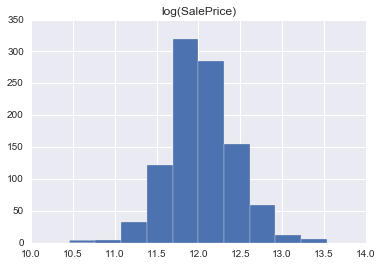

In [45]:
# Check log transform - looks good
%matplotlib inline
train['SalePrice'].log().as_data_frame().hist()

# Execute log transform
train['SalePrice'] = train['SalePrice'].log()
valid['SalePrice'] = valid['SalePrice'].log()
print(train[0:3, 'SalePrice'])

In [64]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

ImportError: cannot import name '_safe_split'

In [ ]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(encoded_combined_nums, y)

In [45]:
h2o.show_progress()                                          # turn on progress bars
from h2o.estimators.glm import H2OGeneralizedLinearEstimator # import GLM models
from h2o.grid.grid_search import H2OGridSearch               

In [46]:
half_train, other_half_train = train.split_frame([0.5], seed=12345)
half_valid, other_half_valid = valid.split_frame([0.5], seed=12345)
print(half_train.shape)
print(half_valid.shape)
print(other_half_train.shape)
print(other_half_valid.shape)
# no idea why this works better, but it does ... 
# could be a lucky split that happens to be more representative of test data
# could be that it just prevents overfitting

(504, 3373)
(230, 3373)
(497, 3373)
(229, 3373)


In [49]:
import re
import time

def gen_submission(preds, test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param preds: Column vector of predictions.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(preds.exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)

In [48]:
import re
import time

def gen_submission_glm(model, test):

    """ Generates submission file for Kaggle House Prices contest.
    
    :param model: Model with which to score test data.
    :param test: Test data.
    
    """
    
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())

    # create predictions column
    sub = test['Id'].cbind(model.predict(test).exp())
    sub.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = str(time_stamp) + '.csv'
    h2o.download_csv(sub, sub_fname)


In [56]:
import os

def pred_blender(dir_, files):
    
    """ Performs simple blending of prediction files. 
    
    :param dir_: Directory in which files to be read are stored.
    :param files: List of prediction files to be blended.
    
    """
    
    # read predictions in files list and cbind
    for i, file in enumerate(files):
        if i == 0:
            df = pd.read_csv(dir_ + os.sep + file).drop('SalePrice', axis=1)
        col = pd.read_csv(dir_ + os.sep + file).drop('Id', axis=1)
        col.columns = ['SalePrice' + str(i)]
        df = pd.concat([df, col], axis=1)
        
    # create mean prediction    
    df['mean'] = df.iloc[:, 1:].mean(axis=1)
    print(df.head())
        
    # create time stamp
    time_stamp = re.sub('[: ]', '_', time.asctime())        
        
    # write new submission file    
    df = df[['Id', 'mean']]
    df.columns = ['Id', 'SalePrice']
    
    # save file for submission
    sub_fname = str(time_stamp) + '.csv'
    df.to_csv(sub_fname, index=False)

In [50]:
def glm_grid(X, y, train, valid):
    
    """ Wrapper function for penalized GLM with alpha and lambda search.
    
    :param X: List of inputs.
    :param y: Name of target variable.
    :param train: Name of training H2OFrame.
    :param valid: Name of validation H2OFrame.
    :return: Best H2Omodel from H2OGeneralizedLinearEstimator

    """
    
    alpha_opts = [0.01, 0.25, 0.5, 0.99] # always keep some L2
    hyper_parameters = {'alpha': alpha_opts}

    # initialize grid search
    grid = H2OGridSearch(
        H2OGeneralizedLinearEstimator(
            family="gaussian",
            lambda_search=True,
            seed=12345),
        hyper_params=hyper_parameters)
    
    # train grid
    grid.train(y=y,
               x=X, 
               training_frame=train,
               validation_frame=valid)

    # show grid search results
    print(grid.show())

    best = grid.get_grid()[0]
    print(best)
    
    # plot top frame values
    yhat_frame = valid.cbind(best.predict(valid))
    print(yhat_frame[0:10, [y, 'predict']])

    # plot sorted predictions
    yhat_frame_df = yhat_frame[[y, 'predict']].as_data_frame()
    yhat_frame_df.sort_values(by='predict', inplace=True)
    yhat_frame_df.reset_index(inplace=True, drop=True)
    _ = yhat_frame_df.plot(title='Ranked Predictions Plot')
    
    # select best model
    return best

glm Grid Build progress: |████████████████████████████████████████████████| 100%
      alpha                                                       model_ids  \
0    [0.25]  Grid_GLM_py_340_sid_88a6_model_python_1498680313620_15_model_1   
1     [0.5]  Grid_GLM_py_340_sid_88a6_model_python_1498680313620_15_model_2   
2    [0.99]  Grid_GLM_py_340_sid_88a6_model_python_1498680313620_15_model_3   
3    [0.01]  Grid_GLM_py_340_sid_88a6_model_python_1498680313620_15_model_0   

    residual_deviance  
0  3.4056149704726546  
1  3.4432799816367816  
2  3.4997037522117393  
3  3.7551576194833487  
None
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  Grid_GLM_py_340_sid_88a6_model_python_1498680313620_15_model_1


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.013012961718910504
RMSE: 0.11407436924616547
MAE: 0.0804187668027057
RMSLE: 0.00892713691702441
R^2: 0.9169172448836034
Mean Residual Deviance: 0.013012961718910504
Null degrees

,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2017-06-28 18:19:13,0.000 sec,0,.12E1,5,0.1494544,0.1443685
,2017-06-28 18:19:13,0.064 sec,0,.12E1,9,0.1408230,0.1363925
,2017-06-28 18:19:13,0.147 sec,0,.11E1,13,0.1325019,0.1287985
,2017-06-28 18:19:13,0.201 sec,0,.11E1,14,0.1245454,0.1215788
,2017-06-28 18:19:14,0.255 sec,0,.1E1,18,0.1170253,0.1147682
---,---,---,---,---,---,---,---
,2017-06-28 18:19:32,18.379 sec,0,.16E-1,140,0.0109210,0.0171281
,2017-06-28 18:19:32,18.715 sec,0,.15E-1,141,0.0108272,0.0173807
,2017-06-28 18:19:32,19.062 sec,0,.14E-1,142,0.0107194,0.0176685
,2017-06-28 18:19:33,19.400 sec,0,.14E-1,148,0.0106092,0.0180386



See the whole table with table.as_data_frame()

glm prediction progress: |████████████████████████████████████████████████| 100%


SalePrice,predict
11.8494,12.0584
12.2061,12.1591
11.6784,11.7536
11.914,11.7733
12.6758,12.4255
12.861,12.7446
12.1035,11.9404
11.2898,11.3687
11.7714,11.6492
11.5843,11.5342



glm prediction progress: |████████████████████████████████████████████████| 100%


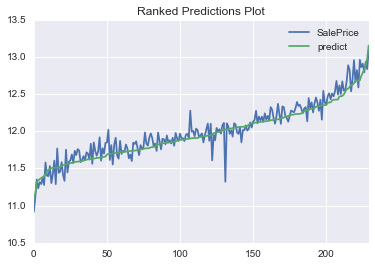

In [51]:
glm0_0 = glm_grid(encoded_combined_nums, 'SalePrice',  half_train, half_valid)
gen_submission_glm(glm0_0,test) # Valid RMSE: 0.1325 #0.1216

In [56]:
#glm0_1 = glm_grid(encoded_combined_nums, 'SalePrice', other_half_train, other_half_valid)
gen_submission_glm(glm0_1,test) # Valid RMSE: 0.11931 0.116

glm prediction progress: |████████████████████████████████████████████████| 100%


In [57]:
pred_blender('/Users/zhaorc/Desktop/ML/files', 
             ['Wed_Jun_28_18_20_10_2017.csv',
              'Wed_Jun_28_18_24_29_2017.csv'])
# 0.13337 on public leaderboard, better than single model!

     Id     SalePrice0     SalePrice1           mean
0  1461  111616.590094  102381.940726  106999.265410
1  1462  142175.020593  142154.134369  142164.577481
2  1463  173016.519084  167166.252038  170091.385561
3  1464  190380.120019  183069.989015  186725.054517
4  1465  211946.803098  202118.377125  207032.590112


In [61]:
# initialize XGB GBM
h2o_xgb_model = H2OXGBoostEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# execute training 
h2o_xgb_model.train(x=encoded_combined_nums,
                    y='SalePrice',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_xgb_model)
h2o_xgb_preds1_val = h2o_xgb_model.predict(valid)
#ranked_preds_plot('SalePrice', valid, h2o_xgb_preds1_val) 
h2o_xgb_preds1_test = h2o_xgb_model.predict(test)
gen_submission(h2o_xgb_preds1_test,test) # 0.16494 on public leaderboard

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1498689887404_6


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.007853003651943
RMSE: 0.08861717470074862
MAE: 0.05100827498154921
RMSLE: 0.006893808013459485
Mean Residual Deviance: 0.007853003651943

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.016968616551748156
RMSE: 0.1302636424784297
MAE: 0.09777677240974243
RMSLE: 0.010149475940399387
Mean Residual Deviance: 0.016968616551748156

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 0.01737877027724037
RMSE: 0.13182856396563064
MAE: 0.08803862458342439
RMSLE: 0.010211667601823064
Mean Residual Deviance: 0.01737877027724037
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0880090,0.0005377,0.0870396,0.0888969,0.0880903
mean_residual_deviance,0.0173193,0.0017439,0.0184114,0.0196417,0.0139046
mse,0.0173193,0.0017439,0.0184114,0.0196417,0.0139046
r2,0.8880365,0.0024635,0.883395,0.8889255,0.8917889
residual_deviance,0.0173193,0.0017439,0.0184114,0.0196417,0.0139046
rmse,0.1312519,0.0067902,0.1356886,0.1401490,0.1179179
rmsle,0.0101616,0.0005652,0.0105334,0.0109000,0.0090512


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-28 19:28:53,7 min 36.977 sec,0.0,11.5392208,11.5324996,133.1536163,11.5129466,11.5056257,132.5479390
,2017-06-28 19:28:54,7 min 38.003 sec,1.0,11.4819725,11.4752177,131.8356917,11.4557013,11.4483439,131.2330931
,2017-06-28 19:28:54,7 min 38.026 sec,2.0,11.4251113,11.4183229,130.5331687,11.3988433,11.3914491,129.9336282
,2017-06-28 19:28:54,7 min 38.051 sec,3.0,11.3687604,11.3619384,129.2487136,11.3424955,11.3350646,128.6522036
,2017-06-28 19:28:54,7 min 38.076 sec,4.0,11.3123131,11.3054570,127.9684283,11.2860513,11.2785832,127.3749540
---,---,---,---,---,---,---,---,---,---
,2017-06-28 19:32:03,10 min 47.413 sec,3400.0,0.0905691,0.0525809,0.0082028,0.1294761,0.0968786,0.0167641
,2017-06-28 19:32:07,10 min 51.461 sec,3466.0,0.0899783,0.0522799,0.0080961,0.1306100,0.0982302,0.0170590
,2017-06-28 19:32:11,10 min 55.478 sec,3530.0,0.0895484,0.0516972,0.0080189,0.1297358,0.0973302,0.0168314
,2017-06-28 19:32:15,10 min 59.482 sec,3594.0,0.0890483,0.0513653,0.0079296,0.1303714,0.0979503,0.0169967



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
BsmtUnfSF|Id,105.0,1.0,0.0057673
Id|BsmtFinSF1,63.0,0.6,0.0034604
YrSold_Tencode|GarageYrBlt,56.0,0.5333333,0.0030759
BsmtUnfSF|BsmtFinSF1,56.0,0.5333333,0.0030759
GarageCars|Id,55.0,0.5238095,0.0030210
---,---,---,---
BsmtUnfSF|ScreenPorch,1.0,0.0095238,0.0000549
Foundation_Tencode|LotConfig_Tencode,1.0,0.0095238,0.0000549
BsmtFullBath|HalfBath,1.0,0.0095238,0.0000549
HouseStyle_Tencode|Heating_Tencode,1.0,0.0095238,0.0000549



See the whole table with table.as_data_frame()

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [59]:
gen_submission(h2o_xgb_preds1_test)

In [46]:
# initialize rf model
rf_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345)           

# train rf model
rf_model1.train(
    x=encoded_combined_nums,
    y='SalePrice',
    training_frame=train,
    validation_frame=valid)

# print model information
print(rf_model1)

rf_preds1_val = rf_model1.predict(valid)
#ranked_preds_plot('SalePrice', valid, rf_preds1_val) # valid RMSE not so hot ...
rf_preds1_test = rf_model1.predict(test)
gen_submission(rf_preds1_test,tesdt) # 0.14574 public leaderboard

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1498689887404_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.017465047624399446
RMSE: 0.13215539196112827
MAE: 0.08985047747144462
RMSLE: 0.010274034427532316
Mean Residual Deviance: 0.017465047624399446

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.016856437588690557
RMSE: 0.12983234415464645
MAE: 0.09266319949920339
RMSLE: 0.010043923523736568
Mean Residual Deviance: 0.016856437588690557

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.01857373183889105
RMSE: 0.13628547919309325
MAE: 0.08988988575395503
RMSLE: 0.01060257046671778
Mean Residual Deviance: 0.01857373183889105
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0898669,0.0003805,0.0892916,0.0905859,0.0897232
mean_residual_deviance,0.0185476,0.0015630,0.0203919,0.0198113,0.0154396
mse,0.0185476,0.0015630,0.0203919,0.0198113,0.0154396
r2,0.879554,0.0049428,0.8708518,0.8879668,0.8798433
residual_deviance,0.0185476,0.0015630,0.0203919,0.0198113,0.0154396
rmse,0.1359363,0.0058699,0.1428003,0.1407526,0.1242561
rmsle,0.0105669,0.0005157,0.0111116,0.0110530,0.0095361


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-28 18:54:03,4 min 4.625 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-28 18:54:03,4 min 5.087 sec,1.0,0.2053192,0.1442051,0.0421560,0.1914737,0.1385821,0.0366622
,2017-06-28 18:54:04,4 min 5.588 sec,2.0,0.2021184,0.1451268,0.0408518,0.1678469,0.1206358,0.0281726
,2017-06-28 18:54:04,4 min 6.077 sec,3.0,0.2059234,0.1444103,0.0424045,0.1531739,0.1111464,0.0234622
,2017-06-28 18:54:05,4 min 6.571 sec,4.0,0.1917852,0.1371583,0.0367816,0.1456185,0.1055259,0.0212048
---,---,---,---,---,---,---,---,---,---
,2017-06-28 18:55:33,5 min 35.108 sec,168.0,0.1324222,0.0899862,0.0175356,0.1298885,0.0927521,0.0168710
,2017-06-28 18:55:34,5 min 35.663 sec,169.0,0.1322458,0.0898968,0.0174889,0.1299202,0.0927988,0.0168793
,2017-06-28 18:55:34,5 min 36.217 sec,170.0,0.1322448,0.0898847,0.0174887,0.1297955,0.0927027,0.0168469
,2017-06-28 18:55:35,5 min 36.696 sec,171.0,0.1322186,0.0898393,0.0174818,0.1298279,0.0926693,0.0168553



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
YearBuilt_Tencode|GrLivArea,2081.1440430,1.0,0.0877169
Neighborhood_Tencode|OverallQual_Tencode,1428.1538086,0.6862350,0.0601944
BsmtQual_Tencode|GrLivArea,1332.3436279,0.6401977,0.0561561
Neighborhood_Tencode|GrLivArea,1069.4122314,0.5138579,0.0450740
LotShape_Tencode|OverallQual_Tencode,898.1904907,0.4315850,0.0378573
---,---,---,---
Street_Tencode|BsmtHalfBath,0.0,0.0,0.0
KitchenAbvGr|GarageCond_Tencode,0.0,0.0,0.0
BsmtHalfBath|WoodDeckSF,0.0,0.0,0.0
BsmtHalfBath|OverallQual_Tencode,0.0,0.0,0.0



See the whole table with table.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


NameError: name 'ranked_preds_plot' is not defined

In [51]:
# initialize extra trees model
ert_model1 = H2ORandomForestEstimator(
    ntrees=10000,                    
    max_depth=10, 
    col_sample_rate_per_tree=0.1,
    sample_rate=0.8,
    stopping_rounds=50,
    score_each_iteration=True,
    nfolds=3,
    keep_cross_validation_predictions=True,
    seed=12345,
    histogram_type='random') # <- this is what makes it ERT instead of RF

# train ert model
ert_model1.train(
    x=encoded_combined_nums,
    y='SalePrice',
    training_frame=train,
    validation_frame=valid)

# print model information/create submission
print(ert_model1)
ert_preds1_val = ert_model1.predict(valid)
#ranked_preds_plot('SalePrice', valid, ert_preds1_val) # valid RMSE not so hot ...
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test) # 0.14855 public leaderboard

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1498689887404_2


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.017323453985374403
RMSE: 0.13161859285592747
MAE: 0.08971813495800218
RMSLE: 0.010215616951008255
Mean Residual Deviance: 0.017323453985374403

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.01674616362065662
RMSE: 0.12940696898025478
MAE: 0.09253415775086733
RMSLE: 0.010005705432735396
Mean Residual Deviance: 0.01674616362065662

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.018302625034448353
RMSE: 0.13528719464327862
MAE: 0.089679622835509
RMSLE: 0.010531151070757647
Mean Residual Deviance: 0.018302625034448353
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
mae,0.0896436,0.0005868,0.0889772,0.0908133,0.0891402
mean_residual_deviance,0.0182710,0.0015450,0.0199324,0.0196966,0.0151841
mse,0.0182710,0.0015450,0.0199324,0.0196966,0.0151841
r2,0.8814029,0.0042932,0.8737618,0.8886153,0.8818315
residual_deviance,0.0182710,0.0015450,0.0199324,0.0196966,0.0151841
rmse,0.1349169,0.0058515,0.1411823,0.1403446,0.1232238
rmsle,0.0104935,0.0005173,0.0109919,0.0110294,0.0094591


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-06-28 19:01:37,4 min 44.728 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-06-28 19:01:37,4 min 45.252 sec,1.0,0.1884594,0.1315495,0.0355170,0.1964560,0.1408567,0.0385950
,2017-06-28 19:01:38,4 min 45.813 sec,2.0,0.1811277,0.1280890,0.0328072,0.1657293,0.1196089,0.0274662
,2017-06-28 19:01:38,4 min 46.302 sec,3.0,0.1842635,0.1298851,0.0339530,0.1537470,0.1102584,0.0236382
,2017-06-28 19:01:39,4 min 46.848 sec,4.0,0.1866581,0.1319614,0.0348412,0.1465753,0.1067205,0.0214843
---,---,---,---,---,---,---,---,---,---
,2017-06-28 19:03:18,6 min 26.028 sec,178.0,0.1314189,0.0896361,0.0172709,0.1296600,0.0927328,0.0168117
,2017-06-28 19:03:19,6 min 26.641 sec,179.0,0.1316618,0.0897088,0.0173348,0.1294732,0.0925901,0.0167633
,2017-06-28 19:03:19,6 min 27.204 sec,180.0,0.1315648,0.0897687,0.0173093,0.1294300,0.0925637,0.0167521
,2017-06-28 19:03:20,6 min 27.763 sec,181.0,0.1315993,0.0897156,0.0173184,0.1293843,0.0925078,0.0167403



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
YearBuilt_Tencode|GrLivArea,1915.9385986,1.0,0.0763218
Neighborhood_Tencode|OverallQual_Tencode,1629.6738281,0.8505877,0.0649184
Neighborhood_Tencode|GrLivArea,1325.6748047,0.6919193,0.0528085
BsmtQual_Tencode|GrLivArea,1322.3671875,0.6901929,0.0526767
LotShape_Tencode|OverallQual_Tencode,1045.6014404,0.5457385,0.0416517
---,---,---,---
3SsnPorch|OverallQual_Tencode,0.0,0.0,0.0
EnclosedPorch|BsmtHalfBath,0.0,0.0,0.0
Condition2_Tencode|BsmtHalfBath,0.0,0.0,0.0
BsmtHalfBath|OverallQual_Tencode,0.0,0.0,0.0



See the whole table with table.as_data_frame()

drf prediction progress: |████████████████████████████████████████████████| 100%


NameError: name 'ranked_preds_plot' is not defined

In [53]:
ert_preds1_test = ert_model1.predict(test)
gen_submission(ert_preds1_test,test) 

drf prediction progress: |████████████████████████████████████████████████| 100%


In [52]:
# initialize H2O GBM
h2o_gbm_model = H2OGradientBoostingEstimator(
    ntrees = 10000,
    learn_rate = 0.005,
    sample_rate = 0.1, 
    col_sample_rate = 0.8,
    max_depth = 5,
    nfolds = 3,
    keep_cross_validation_predictions=True,
    stopping_rounds = 10,
    seed = 12345)

# execute training
h2o_gbm_model.train(x=encoded_combined_nums,
                    y='SalePrice',
                    training_frame=train,
                    validation_frame=valid)

# print model information/create submission
print(h2o_gbm_model)
h2o_gbm_preds1_val = h2o_gbm_model.predict(valid)
#ranked_preds_plot('SalePrice', valid, h2o_gbm_preds1_val) # better validation error
h2o_gbm_preds1_test = h2o_gbm_model.predict(test)
gen_submission(h2o_gbm_preds1_test,test) # 0.15062 public leaderboard

gbm Model Build progress: |██ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_86e4177fb430f7c8e717e18bfbe647c4> was cancelled by the user.

In [62]:
stack = H2OStackedEnsembleEstimator(training_frame=train, 
                                    validation_frame=valid, 
                                    base_models=[rf_model1, ert_model1, 
                                                h2o_xgb_model ])

stack.train(x=encoded_combined_nums,
            y='SalePrice',
            training_frame=train,
            validation_frame=valid)

# print model information/create submission
print(stack)
stack_preds1_val = stack.predict(valid)
#ranked_preds_plot('SalePrice', valid, stack_preds1_val) 
stack_preds1_test = stack.predict(test)
gen_submission(stack_preds1_test,test)
# 0.14630 on public leaderboard


stackedensemble Model Build progress: |███████████████████████████████████| 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1498689887404_7
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0034407737204677482
RMSE: 0.05865810873585806
MAE: 0.038323727129800055
RMSLE: 0.004567249541024737
R^2: 0.9778114573204629
Mean Residual Deviance: 0.0034407737204677482
Null degrees of freedom: 1000
Residual degrees of freedom: 998
Null deviance: 155.22490791465145
Residual deviance: 3.444214494188216
AIC: -2829.016029585025

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.015806196337453733
RMSE: 0.12572269619067886
MAE: 0.09338725977567938
RMSLE: 0.009779977163840879
R^2: 0.9062031545111939
Mean Residual Deviance: 0.015806196337453733
Null degrees of freedom: 458
Residual degrees of freedom: 456
Null deviance: 77.67997881888834
Residual

In [54]:
pwd

'/Users/zhaorc/Desktop/ML/files'

In [57]:
pred_blender('/Users/zhaorc/Desktop/ML/files',
            ['Wed_Jun_28_18_56_40_2017.csv',
             'Wed_Jun_28_19_08_51_2017.csv',
             
             ])

     Id     SalePrice0     SalePrice1           mean
0  1461  115618.585364  115372.946635  115495.766000
1  1462  145790.952075  144456.925647  145123.938861
2  1463  182612.710025  183921.055115  183266.882570
3  1464  187103.373944  188835.291566  187969.332755
4  1465  189100.822295  193122.915893  191111.869094
